In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_excel('cleaned_data.xlsx')
df.head()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,50001,4,Mobile,3,6,DC,Female,3,3,Laptop,2,Single,9,1,11,1,1,5,159.93,1
1,50002,10,Mobile,1,8,UPI,Male,3,4,Mobile,3,Single,7,1,15,0,1,0,120.90,1
2,50003,10,Mobile,1,30,DC,Male,2,4,Mobile,3,Single,6,1,14,0,1,3,120.28,1
3,50004,0,Mobile,3,15,DC,Male,2,4,Laptop,5,Single,8,0,23,0,1,3,134.07,1
4,50005,0,Mobile,1,12,CC,Male,3,3,Mobile,5,Single,3,0,11,1,1,3,129.60,1


In [5]:
df.shape

(5630, 20)

In [7]:
df.describe()

,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,10.180995,1.654707,15.531261,2.934636,3.688988,3.066785,4.214032,0.284902,15.721670,1.716874,2.961812,4.459325,177.223030,0.168384
std,1625.385339,8.354261,0.915389,8.082318,0.705528,1.023999,1.380194,2.583586,0.451408,3.588459,1.857640,2.879248,3.570626,49.207036,0.374240
min,50001.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,51408.250000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000,0.000000
50%,52815.500000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000,0.000000
75%,54222.750000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500,0.000000
max,55630.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000,1.000000


In [13]:
def Unique_List():
  unique = []
  for col in df.columns:
    if col in ['CustomerID', 'CashbackAmount']:
      unique.append('Number of values too long for dataframe!')
    else:
      unique.append(df[col].unique())
  return unique

In [15]:
basic_info = pd.DataFrame({'Columns' : df.columns,
                           'Data Type' : df.dtypes.values,
                           'No. of unique values' : df.nunique().values,
                           'Unique values' : Unique_List()})
basic_info

,Columns,Data Type,No. of unique values,Unique values
0,CustomerID,int64,5630,Number of values too long for dataframe!
1,Tenure,int64,36,"[4, 10, 0, 13, 11, 9, 19, 20, 14, 8, 18, 5, 2,..."
2,PreferredLoginDevice,object,2,"[Mobile, Computer]"
3,CityTier,int64,3,"[3, 1, 2]"
4,WarehouseToHome,int64,32,"[6, 8, 30, 15, 12, 22, 11, 9, 31, 18, 13, 20, ..."
5,PreferredPaymentMode,object,5,"[DC, UPI, CC, COD, E wallet]"
6,Gender,object,2,"[Female, Male]"
7,HourSpendOnApp,int64,6,"[3, 2, 1, 0, 4, 5]"
8,NumberOfDeviceRegistered,int64,6,"[3, 4, 5, 2, 1, 6]"
9,PreferedOrderCat,object,5,"[Laptop, Mobile, Others, Fashion, Grocery]"


### OBSERVATION :

We have a total of 5630 customers information



Numeric features : 13 (exclusing CustomerID and Churn), out of which 3 of them are categorical data



String type features : 5


So we might have a total of 10 numeric and 8 categorical input features. Lets explore them one by one.

In [20]:
df['Churn'].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

C:\Users\91932\AppData\Local\Temp\ipykernel_19408\454218547.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


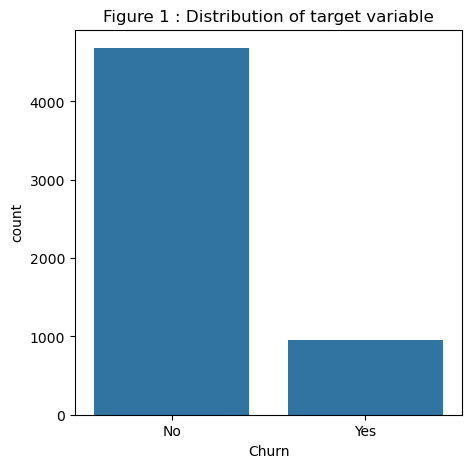

In [22]:
x_labels= ['No', 'Yes']

fig,ax = plt.subplots(figsize=(5,5))
ax=sns.countplot(x='Churn', data=df)
ax.set_xticklabels(x_labels)
plt.title('Figure 1 : Distribution of target variable')
plt.show()

In [24]:
# Function to plot the distribution of numerical variable
def plot_num_var(var_name, var_label, bin_num, fig_num):
  plt.figure(figsize = (25,5))
  plt.suptitle('Figure {} : Distribution of {}'.format(fig_num,var_name))

  plt.subplot(1,2,1)
  sns.histplot(data=df, x=var_name, bins=bin_num)
  plt.title('Fig {}(a)'.format(fig_num))
  plt.xlabel(var_name)
  plt.ylabel('Count')

  plt.subplot(1,2,2)
  sns.boxplot(data=df, x=var_name)
  plt.title('Fig {}(b)'.format(fig_num))
  plt.xlabel(var_name)
  
  plt.show()
     

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the distribution of a numerical variable by Churn value
def plot_numvar_churn(var_name, var_label, bin_num, fig_num):
    plt.figure(figsize=(25, 5))
    plt.suptitle(f'Figure {fig_num} : Distribution of {var_label} by Churn value', fontsize=16)

    # Plot 1: Histogram or KDE for distribution comparison by Churn
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=var_name, hue='Churn', bins=bin_num, kde=True)  # Added KDE for smooth curve
    plt.title(f'Fig {fig_num}(a): Distribution of {var_label}')
    plt.xlabel(var_label)
    plt.ylabel('Count')

    # Plot 2: Boxplot to compare distribution by Churn
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='Churn', y=var_name)
    plt.title(f'Fig {fig_num}(b): {var_label} Distribution by Churn')
    plt.xlabel('Churn value')
    plt.ylabel(var_label)

    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the distribution of a numerical variable by Churn value
def plot_numvar_churn(var_name, var_label, bin_num, fig_num):
    plt.figure(figsize=(25, 5))
    plt.suptitle(f'Figure {fig_num} : Distribution of {var_label} by Churn value', fontsize=16)

    # Plot 1: Histogram or KDE for distribution comparison by Churn
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x=var_name, hue='Churn', bins=bin_num, kde=True)  # Histogram with KDE
    plt.title(f'Fig {fig_num}(a): Distribution of {var_label}')
    plt.xlabel(var_label)
    plt.ylabel('Count')

    # Plot 2: Separate Boxplots for Churn == 0 and Churn == 1
    plt.subplot(1, 3, 2)
    sns.boxplot(data=df[df['Churn'] == 0], y=var_name)
    plt.title(f'Fig {fig_num}(b): {var_label} for Churn == 0')
    plt.xlabel('Churn 0')
    plt.ylabel(var_label)

    plt.subplot(1, 3, 3)
    sns.boxplot(data=df[df['Churn'] == 1], y=var_name)
    plt.title(f'Fig {fig_num}(c): {var_label} for Churn == 1')
    plt.xlabel('Churn 1')
    plt.ylabel(var_label)

    plt.tight_layout()
    plt.show()


# Tenure of customer in organization : 'Tenure'

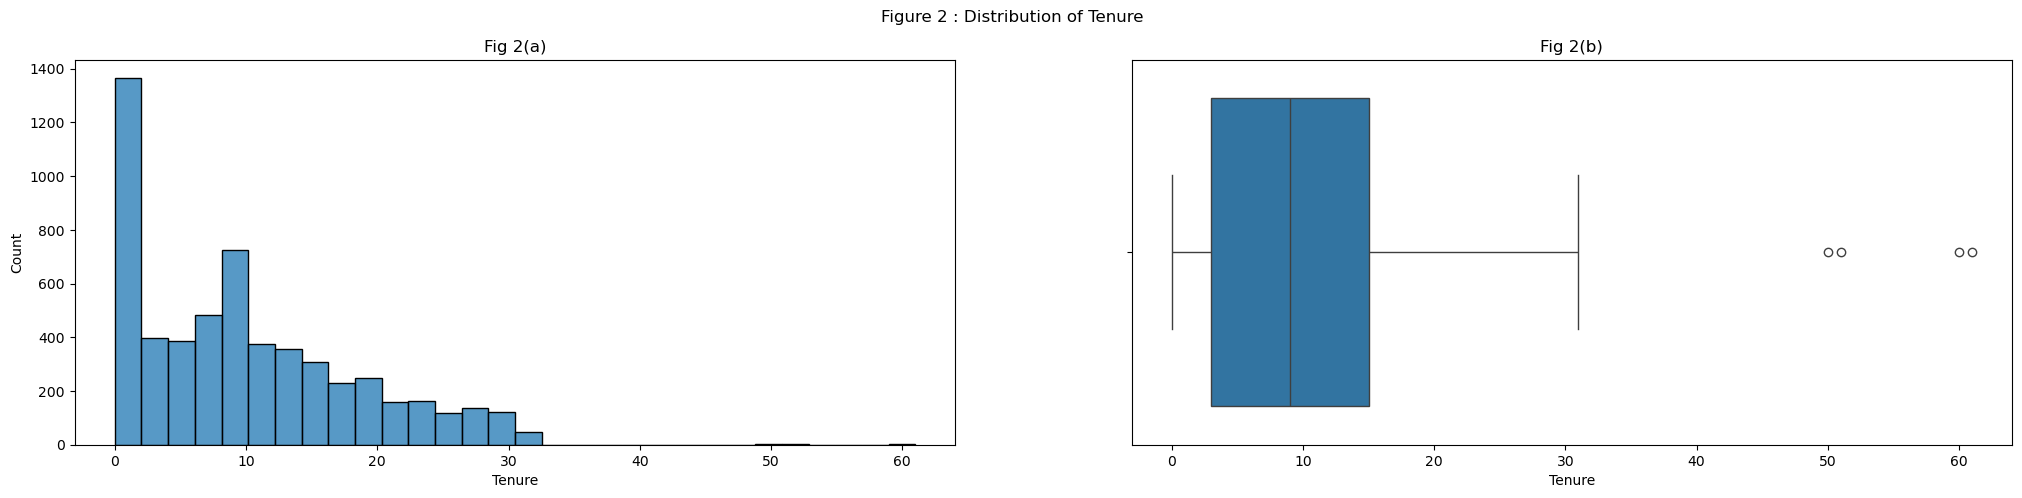

In [49]:
plot_num_var('Tenure', 'Churn', 30, 2)

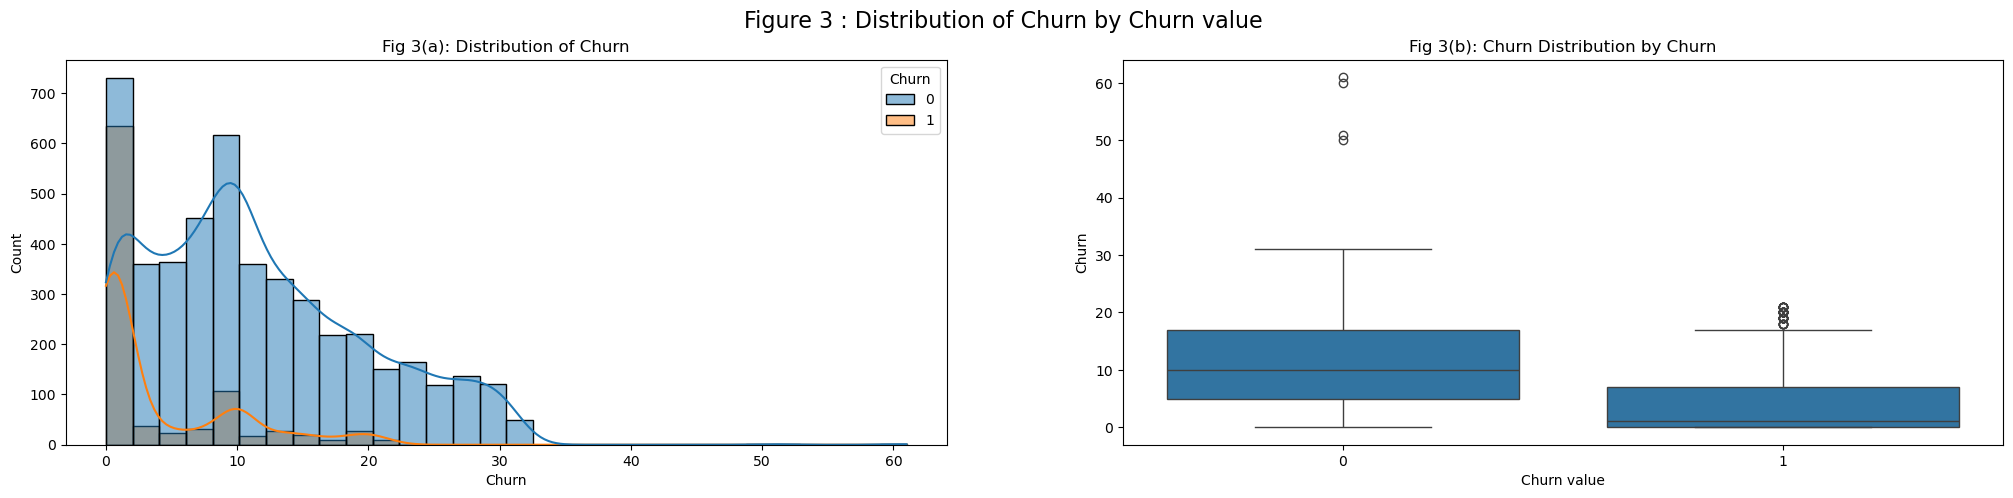

In [36]:
# Distribution of Tenure of customers by Churn value
plot_numvar_churn('Tenure', 'Churn', 30, 3)

In [40]:
percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]
df.groupby('Churn')['Tenure'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,11.443614,8.258140,0.0,1.0,4.0,5.0,6.0,8.0,10.0,12.0,15.0,17.0,19.0,24.0,31.00,61.0
1,948.0,3.945148,5.563415,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,7.0,10.0,12.3,20.53,21.0


# Observation:

1.Tenure Distribution: Most customers have a tenure between 0 and 20 months, confirming that the data is right-skewed. The non-churned customers have a   wider tenure range, with some having stayed for as long as 61 months. The churned customers, on the other hand, tend to leave earlier, with their       maximum tenure being 21 months.

2.Early Churn: A significant proportion of churned customers leave within the first 2 to 3 months of service, as shown in the data and Fig 3(a). In       fact, around 50% to 60% of customers who churn have a tenure of only 1 month. However, drawing definitive conclusions based on such short tenure        might not fully capture the complexity of the customer relationship.

3.Churn Decreases with Tenure: As tenure increases, the likelihood of churn decreases, which aligns with both the statistical observations and Fig        3(a). Customers who remain with the service for longer periods are less likely to churn.

4.Outliers: A few outliers are present with tenure exceeding 50 months (Fig 2(b)), particularly for non-churned customers, suggesting there are a small   number of very long-term customers.

5.Maximum Tenure for Churned Customers: The maximum tenure for churned customers is 21 months, meaning no churned customers have a tenure longer than     this. All customers with a tenure beyond 21 months remain with the service.

6.Feature Importance: Given the clear pattern of early churn and the decreasing likelihood of churn with increasing tenure, Tenure is likely to be an     important feature for predicting churn in a machine learning model.

# Distance in between warehouse to home of customer : 'WarehouseToHome'

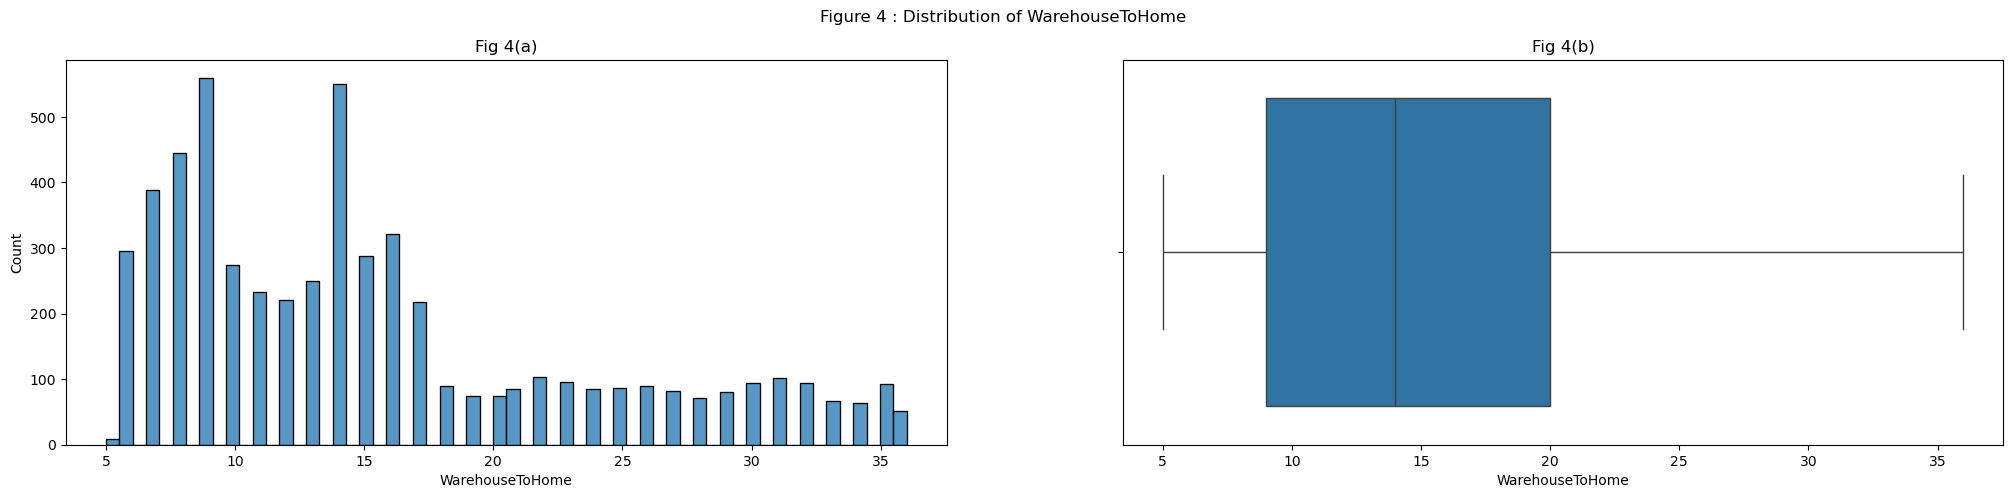

In [45]:
plot_num_var('WarehouseToHome', 'Churn', 60, 4)

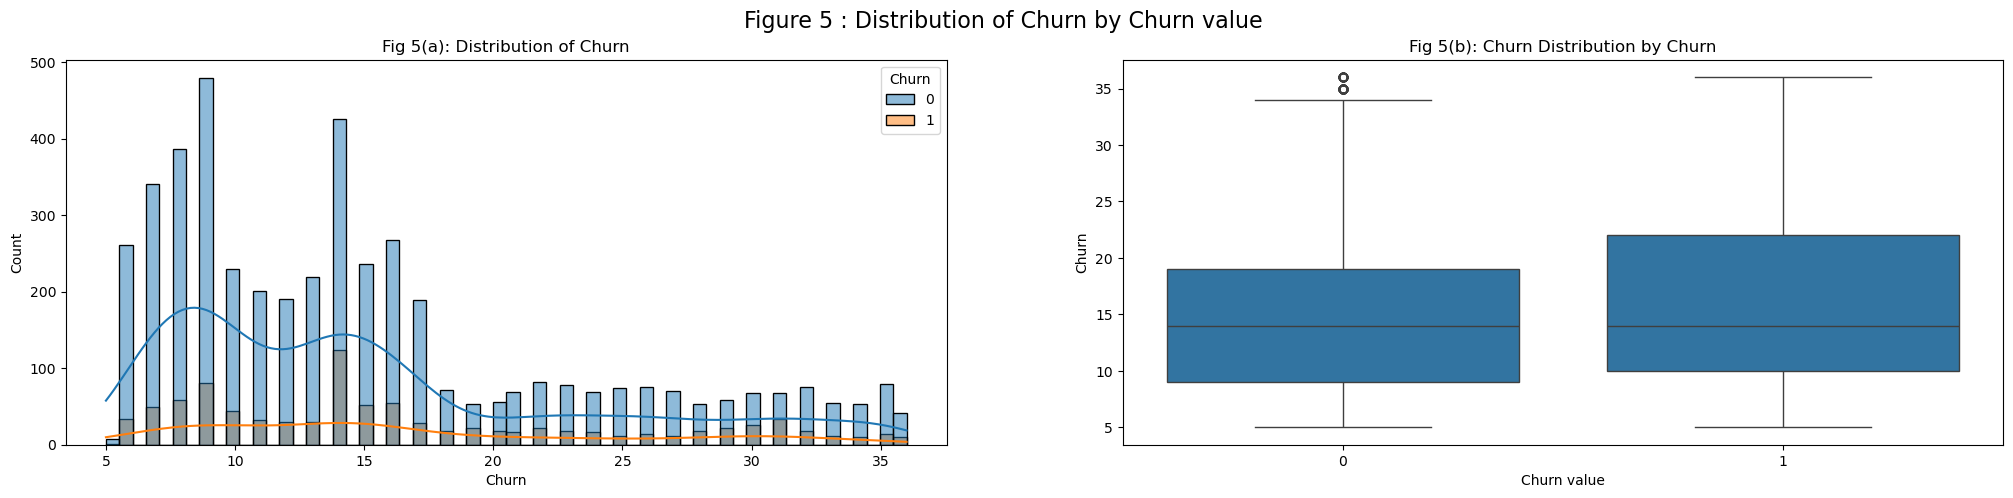

In [47]:
plot_numvar_churn('WarehouseToHome', 'Churn', 60, 5)

In [51]:
df.groupby('Churn')['WarehouseToHome'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,15.262922,8.014398,5.0,7.0,8.0,9.0,9.0,11.0,14.0,15.0,17.0,19.0,22.0,29.0,35.00,36.0
1,948.0,16.856540,8.287501,5.0,8.0,9.0,10.0,11.0,14.0,14.0,16.0,20.0,22.0,25.6,31.0,35.53,36.0


# OBSERVATION:

1.Distance Distribution: Most customers live between 5 to 20 kilometers from the warehouse, with the distribution being right-skewed. This suggests       that while most customers are relatively close to the warehouse, there are fewer customers living at greater distances.

2.Churn Consistency: The ratio of churned to non-churned customers remains consistent as the distance from the warehouse increases. This indicates that   distance does not appear to significantly impact the likelihood of customer churn.

3.Mean Distance Comparison: The mean distances for churned and non-churned customers do not show any significant differences, suggesting that proximity   to the warehouse is not a distinguishing factor between those who stay and those who leave.

4.Feature Importance: Given the consistent churn rates across varying distances and the lack of significant differences in mean distance between          churned and non-churned customers, it is likely that the WarehouseToHome distance feature does not contribute much value to the predictive model for    churn.

# Percentage increases in order from last year : 'OrderAmountHikeFromlastYear'

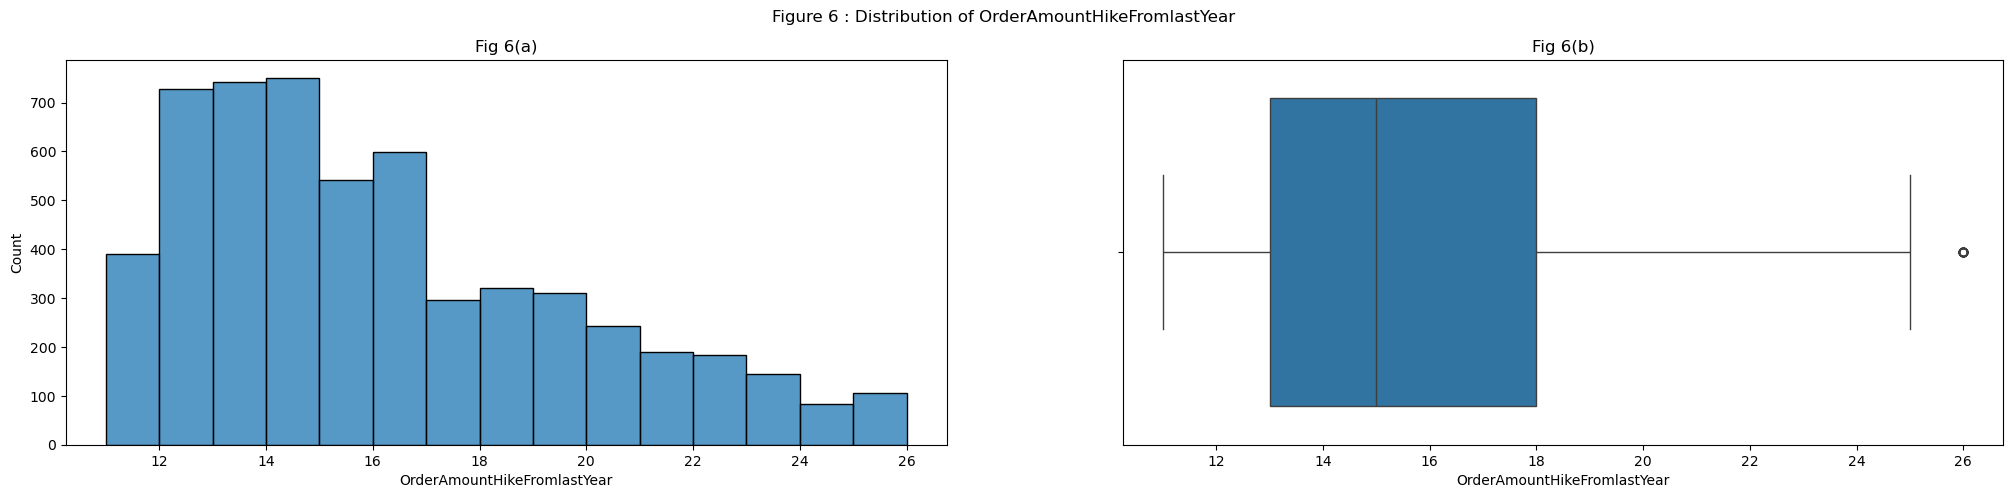

In [54]:
plot_num_var('OrderAmountHikeFromlastYear', 'Churn', 15, 6)
     

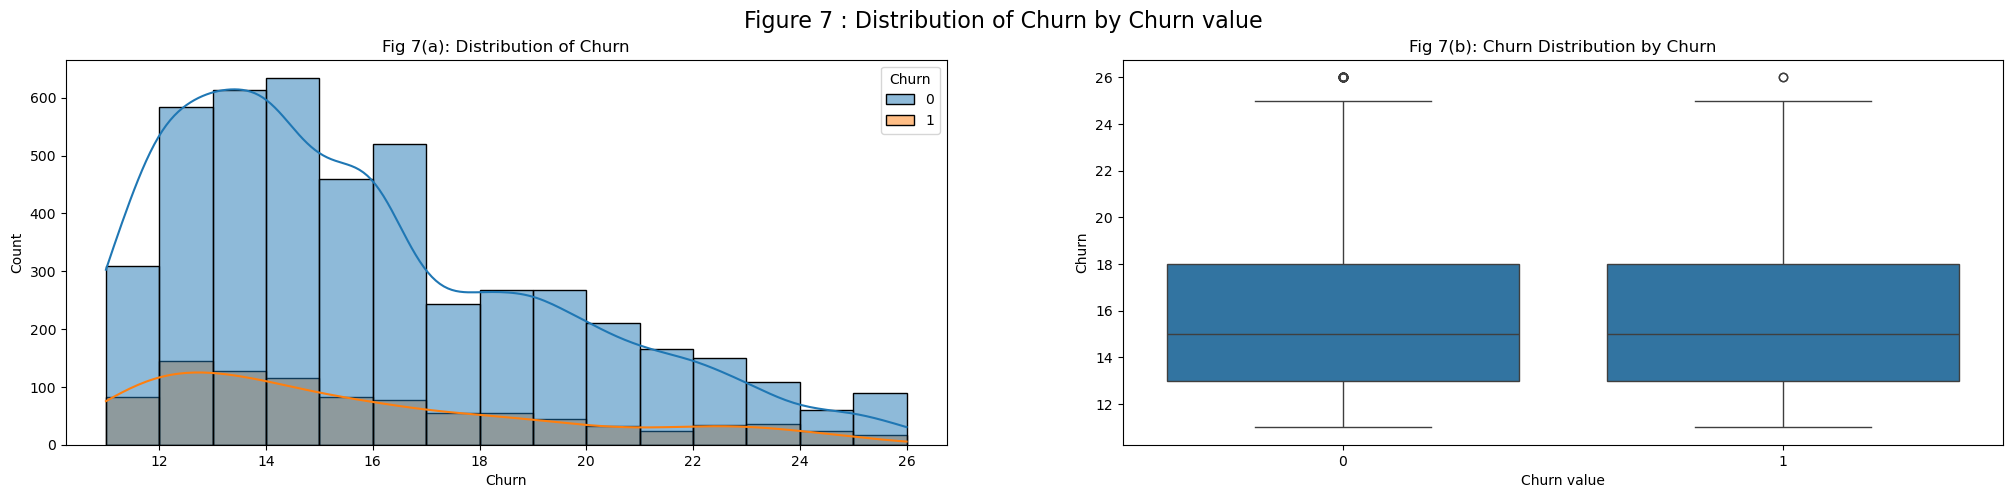

In [56]:
plot_numvar_churn('OrderAmountHikeFromlastYear', 'Churn', 15, 7)
     

In [58]:
df.groupby('Churn')['OrderAmountHikeFromlastYear'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,15.739641,3.547692,11.0,12.0,13.0,13.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,21.0,25.0,26.0
1,948.0,15.632911,3.784068,11.0,12.0,12.0,13.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,22.0,25.0,26.0


# OBSERVATION:

1.Distribution Overview: The statistics for OrderAmountHikeFromLastYear indicate that non-churned customers (Churn = 0) have a mean hike of 15.74,        while churned customers (Churn = 1) have a mean hike of 15.63. Both groups exhibit similar central tendencies, suggesting that the hike in order        amounts does not significantly differentiate between churned and non-churned customers.

2.Consistency in Tenure: The standard deviation is relatively close between both groups (3.55 for non-churned and 3.78 for churned), indicating similar   variability in order amount hikes across both segments.

3.Range and Percentiles:


   The minimum order amount hike for both groups is 11, reflecting a consistent baseline.

   The maximum hike is 26 for both groups, suggesting that the top end of the distribution is similar.

   The percentiles show that the majority of both churned and non-churned customers have hikes clustered around the same values, particularly between      12 and 19.

   
4.Feature Relevance: Given the close means, similar standard deviations, and overlapping percentiles, it appears that OrderAmountHikeFromLastYear does    not provide substantial differentiation for predicting churn. Therefore, this feature may not contribute significant value to the churn prediction      model.

# Total number of coupon has been used in last month : 'CouponUsed'

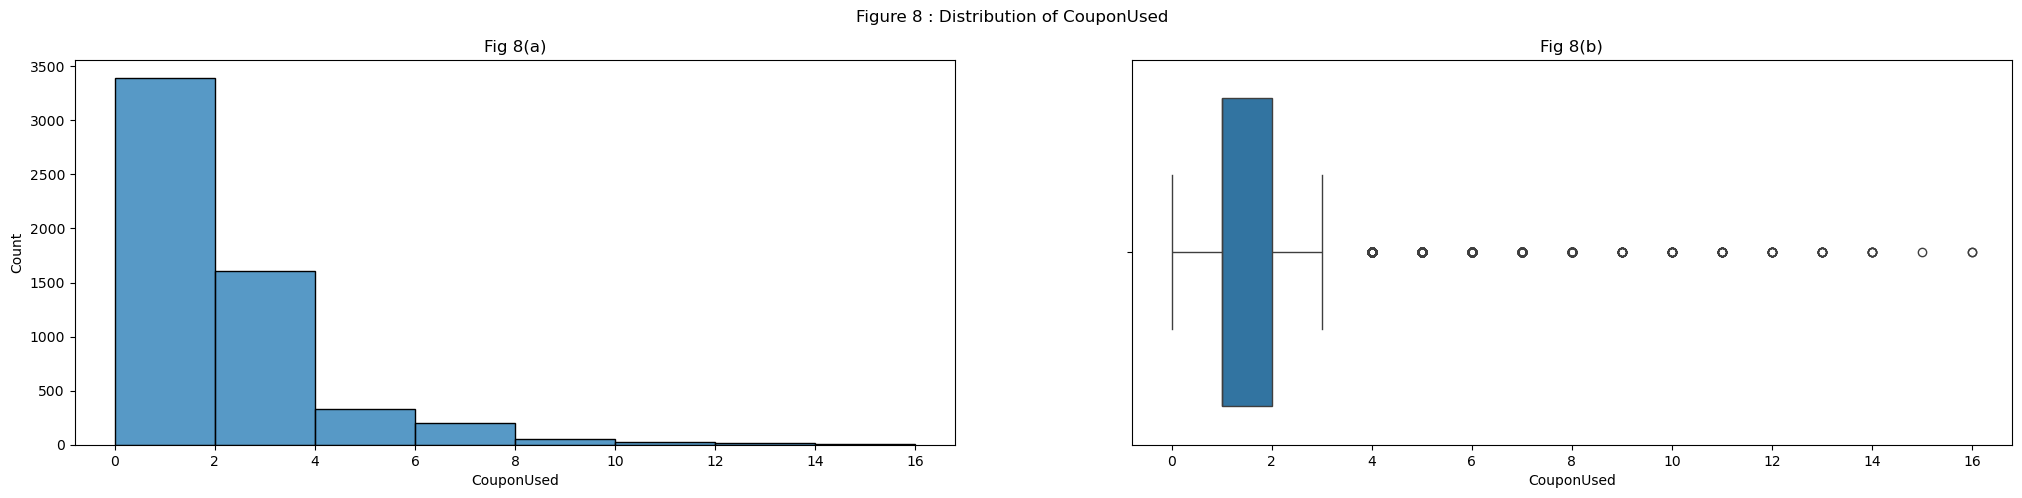

In [72]:
plot_num_var('CouponUsed', 'Churn', 8, 8)

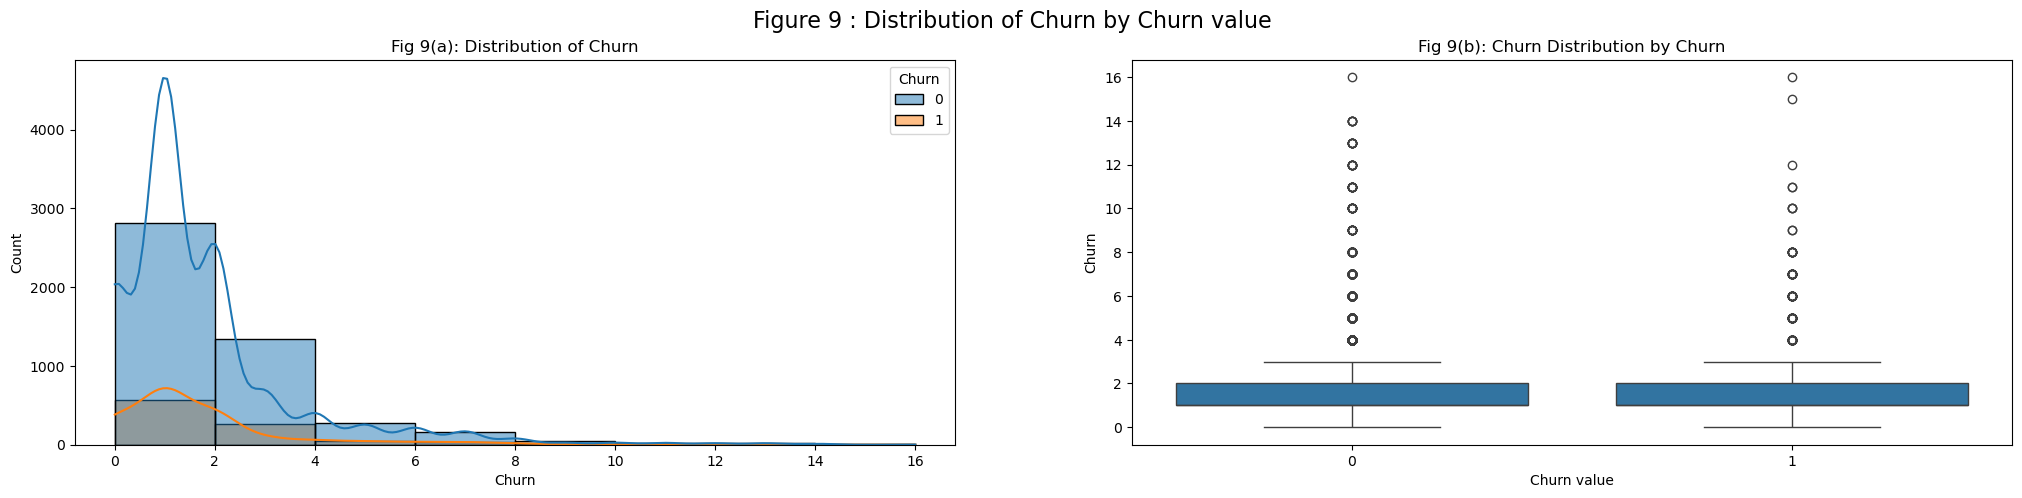

In [74]:
plot_numvar_churn('CouponUsed', 'Churn', 8, 9)

In [76]:
df.groupby('Churn')['CouponUsed'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,1.718069,1.850065,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,9.00,16.0
1,948.0,1.710970,1.895586,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,8.53,16.0


# OBSERVATION:

1.Distribution Overview: The statistics for CouponUsed reveal that non-churned customers (Churn = 0) have a mean coupon usage of 1.72, while churned      customers (Churn = 1) have a mean of 1.71. This indicates that the average usage of coupons is very similar between the two groups, suggesting no       significant difference in coupon utilization related to churn.

2.Consistency in Variability: The standard deviation is also comparable, with 1.85 for non-churned and 1.90 for churned customers. This indicates that    the variability in coupon usage is consistent across both segments.

3.Range and Percentiles:

   The minimum coupon usage for both groups is 0, showing that some customers do not utilize any coupons.


   The maximum usage is 16 for both groups, indicating that both churned and non-churned customers have the potential to use coupons at similar rates.



   The percentiles show that most customers, regardless of their churn status, primarily use 1 or 2 coupons, as evidenced by the values in the lower       percentiles (10th to 90th).


4.Feature Relevance: Given the negligible difference in mean values, close standard deviations, and similar distribution of coupon usage between          churned and non-churned customers, it appears that CouponUsed does not serve as a strong predictor for customer churn. Consequently, this feature may   not contribute significant value to the churn prediction model.

# Total number of orders has been places in last month : 'OrderCount'

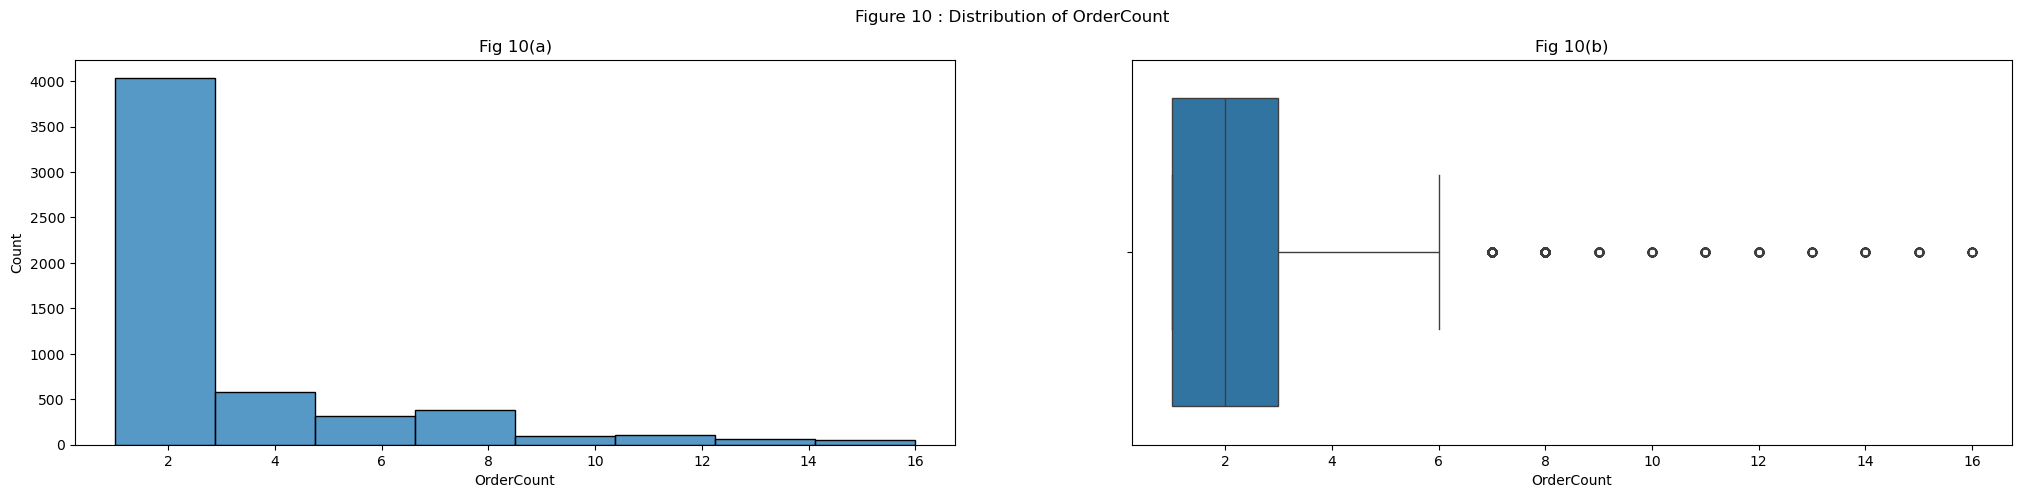

In [83]:
plot_num_var('OrderCount', 'Churn', 8, 10)

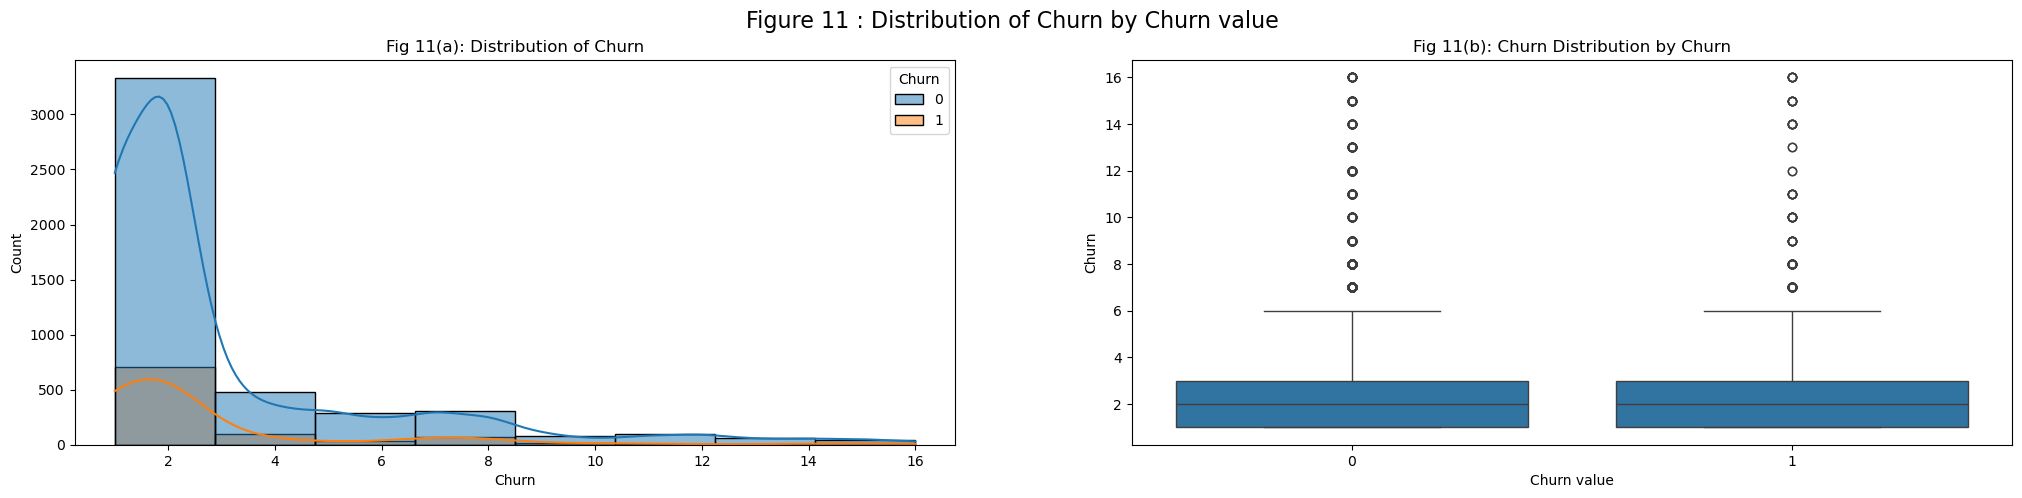

In [130]:
plot_numvar_churn('OrderCount', 'Churn', 8, 11)

In [87]:
df.groupby('Churn')['OrderCount'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,2.992952,2.897183,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,7.0,14.0,16.0
1,948.0,2.808017,2.785363,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,7.0,15.0,16.0


# OBSERVATION:

1.Order Count Distribution: Most customers have ordered up to 3 times in the last month, indicating a right-skewed distribution. This suggests that       while the majority of customers place a limited number of orders, there are fewer customers with higher order counts.

2.Mean Comparison: The mean number of orders for both churned customers (Churn = 1) and non-churned customers (Churn = 0) does not show any significant   difference. This indicates that order frequency is similar across both groups.

3.Feature Relevance: Given the lack of significant differentiation in order counts between churned and non-churned customers, it can be inferred that     OrderCount does not provide substantial predictive value for understanding customer churn. Therefore, this feature may not be a critical input for      the churn prediction model.

# Day Since last order by customer : 'DaySinceLastOrder'

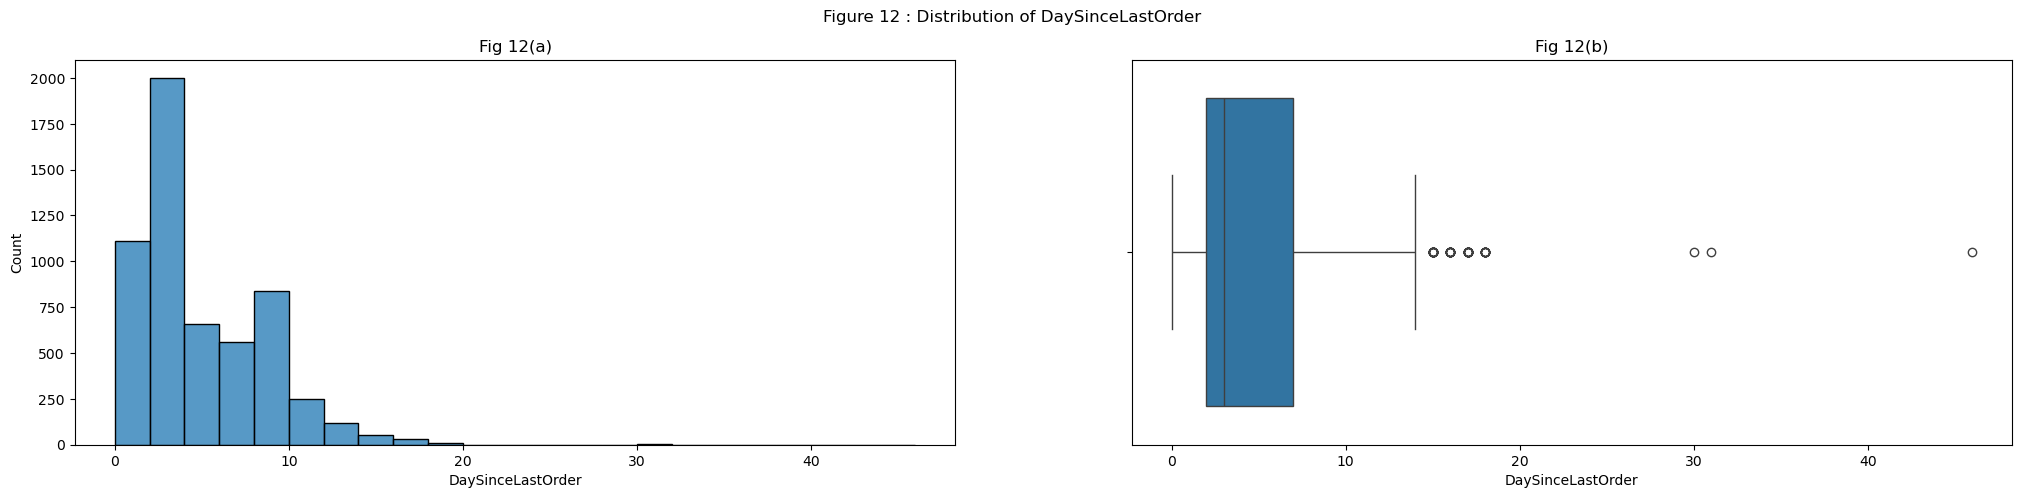

In [90]:
plot_num_var('DaySinceLastOrder', 'Churn', 23, 12)

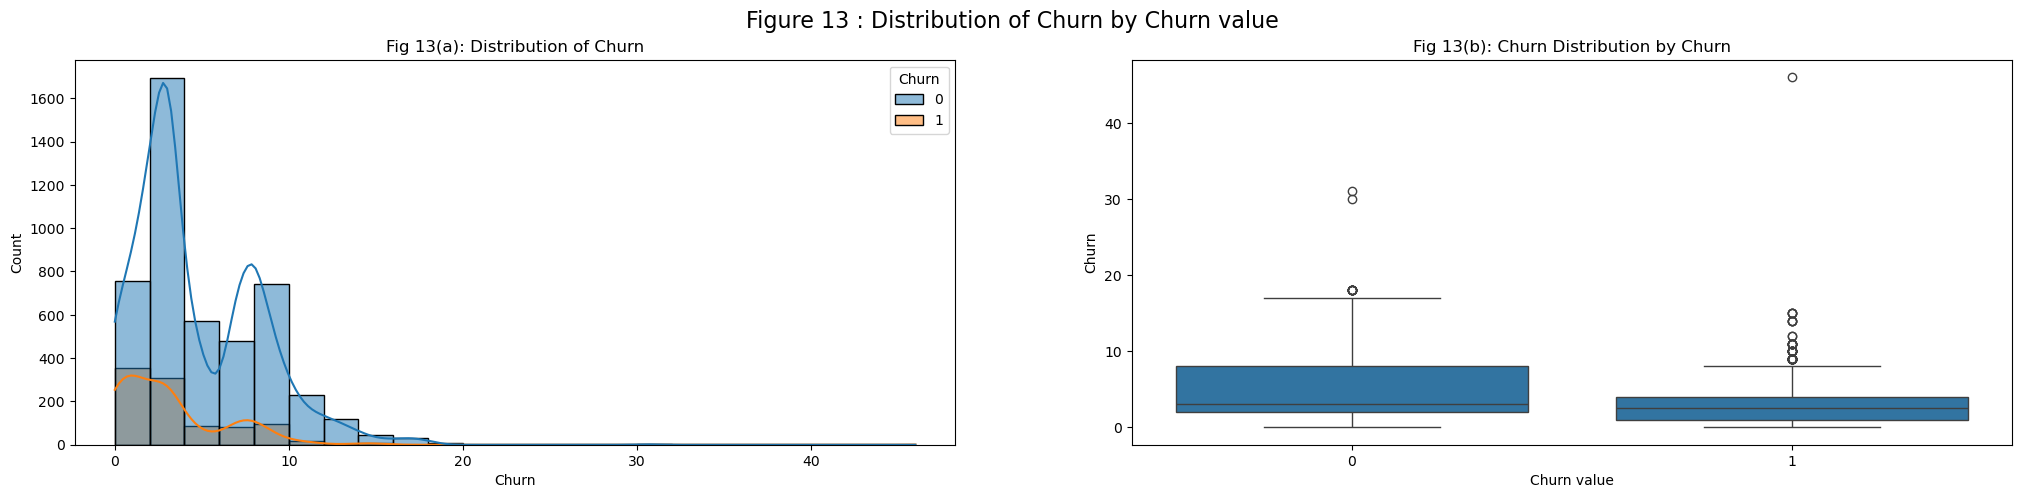

In [132]:
plot_numvar_churn('DaySinceLastOrder', 'Churn', 23, 13)

In [94]:
df.groupby('Churn')['DaySinceLastOrder'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,4.709739,3.568374,0.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0,7.0,8.0,8.0,9.0,15.0,31.0
1,948.0,3.222574,3.316790,0.0,0.0,1.0,1.0,1.0,2.0,2.5,3.0,4.0,4.0,6.0,8.0,12.0,46.0


# OBSERVATION:

1.Distribution Overview: The statistics for DaysSinceLastOrder reveal that non-churned customers (Churn = 0) have a mean of approximately 4.71 days       since their last order, while churned customers (Churn = 1) have a lower mean of about 3.22 days. This indicates that non-churned customers tend to     have more recent orders compared to those who have churned.

2.Variability in Days: The standard deviation is higher for non-churned customers (3.57) compared to churned customers (3.32), suggesting that while      the average time since the last order is longer for non-churned customers, there is more variability in this duration within that group.

3.Range and Percentiles:

The minimum days since the last order for both groups is 0, indicating that some customers have ordered recently.


The maximum for non-churned customers is 31 days, whereas for churned customers it is significantly higher at 46 days, indicating that some churned 
customers have not ordered in a long time.


The percentiles show that churned customers frequently have longer gaps since their last order, especially noted in the lower percentiles (0-30% range), where many churned customers have not ordered in the past few days.


4.Feature Relevance: The evident difference in means, combined with the higher maximum days for churned customers, suggests that DaysSinceLastOrder may   be an important feature for predicting customer churn. The shorter intervals since the last order among non-churned customers might imply a more        engaged customer base, making this feature potentially valuable for the churn prediction model.

# Average cashback in last month : 'CashbackAmount'

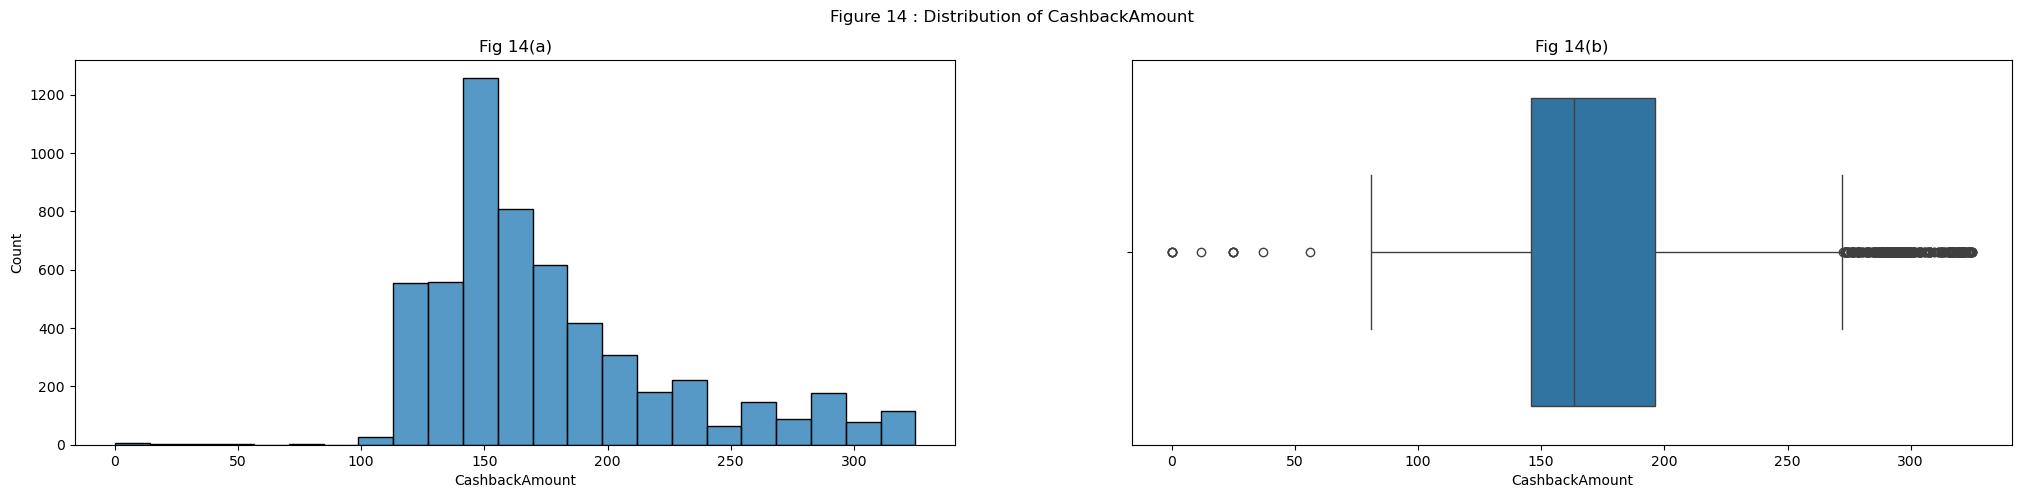

In [97]:
plot_num_var('CashbackAmount', 'Churn', 23, 14)

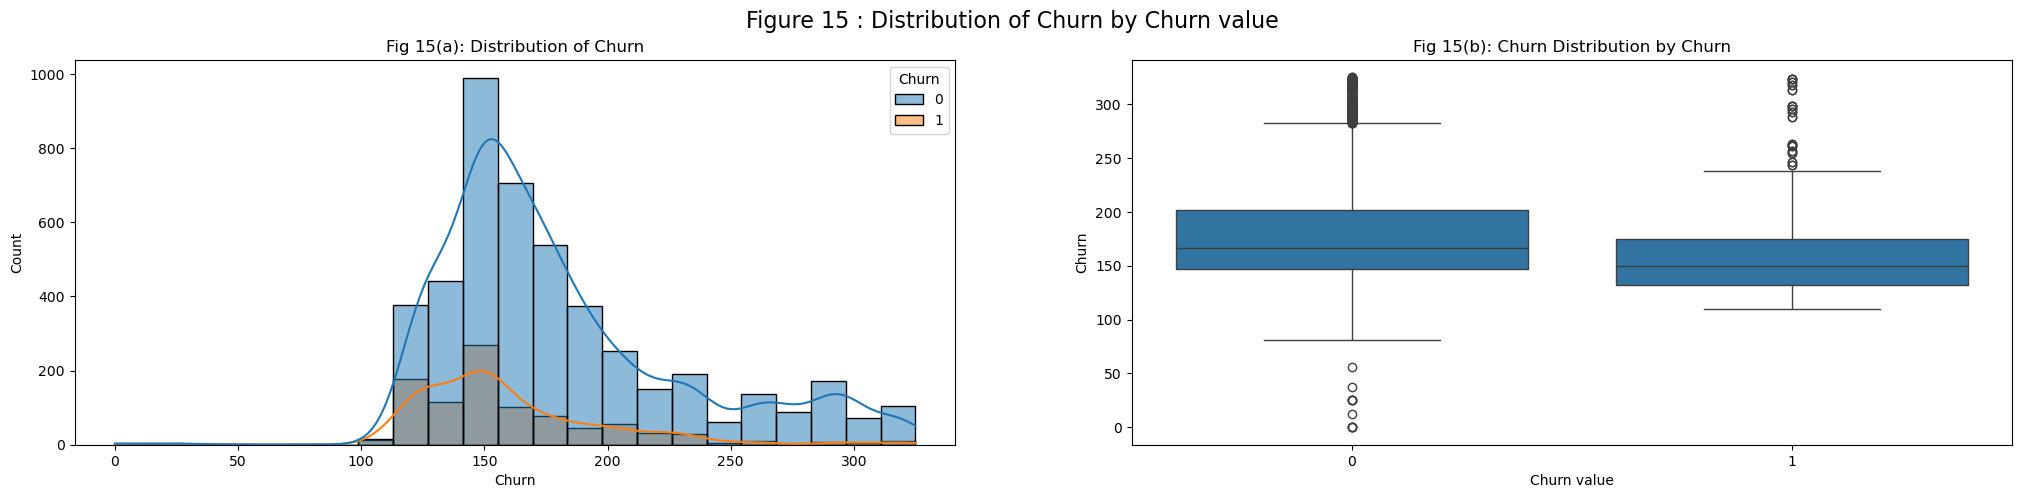

In [134]:
plot_numvar_churn('CashbackAmount', 'Churn', 23, 15)

In [104]:
df.groupby('Churn')['CashbackAmount'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,180.635203,50.434791,0.00,128.371,143.778,147.24,150.039,156.31,166.115,176.35,190.151,201.25,215.666,265.91,319.0847,324.99
1,948.0,160.370928,38.436055,110.09,123.210,127.414,132.02,139.040,146.80,149.660,154.73,167.350,174.69,185.356,212.22,306.3545,323.59


# OBSERVATION:

1.Distribution Overview: The statistics for CashbackAmount indicate that non-churned customers (Churn = 0) have a mean cashback of approximately          180.64, while churned customers (Churn = 1) have a lower mean cashback of about 160.37. This suggests that non-churned customers tend to receive        higher cashback amounts compared to those who have churned.

2.Variability in Cashback: The standard deviation is greater for non-churned customers (50.43) compared to churned customers (38.44), indicating that     there is more variability in the cashback amounts received by non-churned customers.

3.Range and Percentiles:

The minimum cashback amount for churned customers is 110.09, while non-churned customers have a minimum of 0.00, suggesting that some customers might not have received any cashback.

The maximum cashback amount is 324.99 for non-churned customers and 323.59 for churned customers, showing that both groups have similar maximum values.

The percentiles indicate that churned customers generally have lower cashback amounts, particularly in the lower percentiles, as many churned customers fall below the 150 mark.


4.Feature Relevance: The differences in mean cashback amounts, combined with the variability in cashback for non-churned customers, suggest that          CashbackAmount may be a relevant feature for predicting customer churn. Higher cashback amounts may correlate with customer retention, indicating       that this feature could provide valuable insights for the churn prediction model.

# Number of hours spent on mobile application : 'HourSpendOnApp'

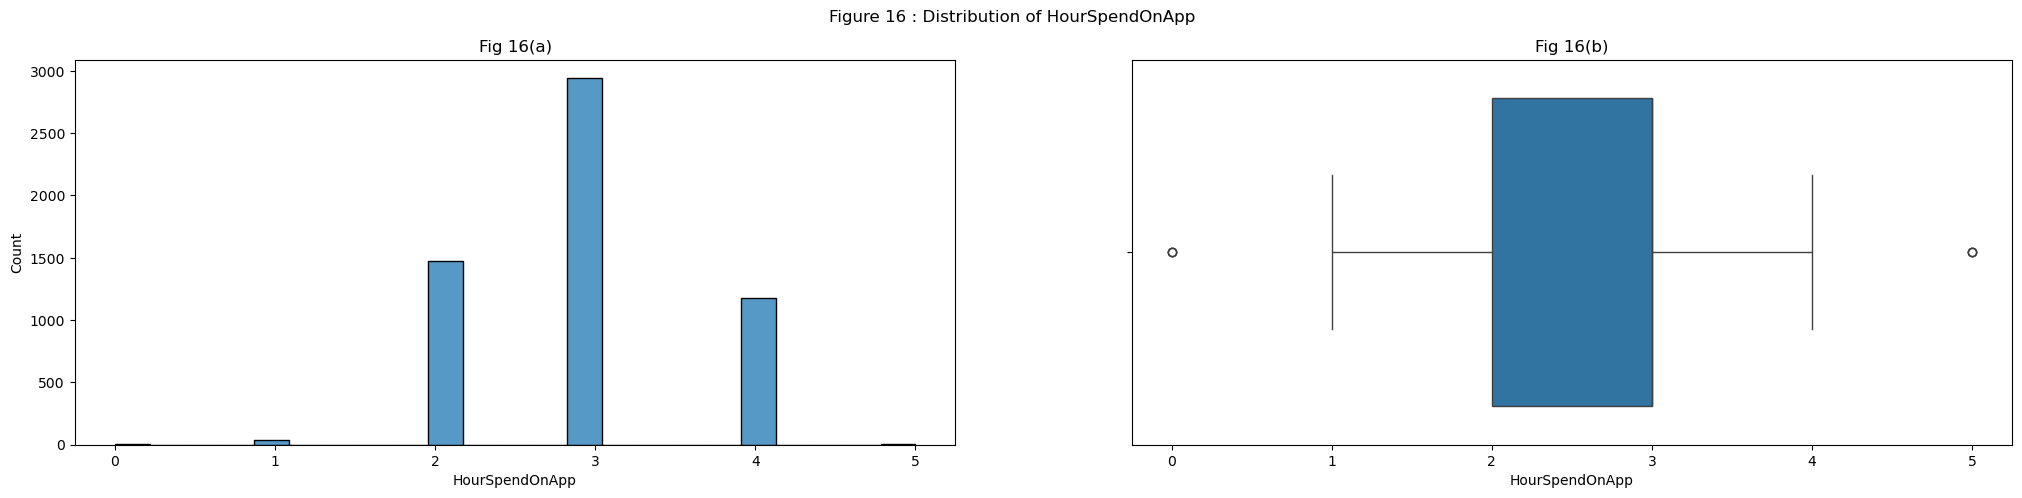

In [109]:
plot_num_var('HourSpendOnApp', 'Churn', 23, 16)

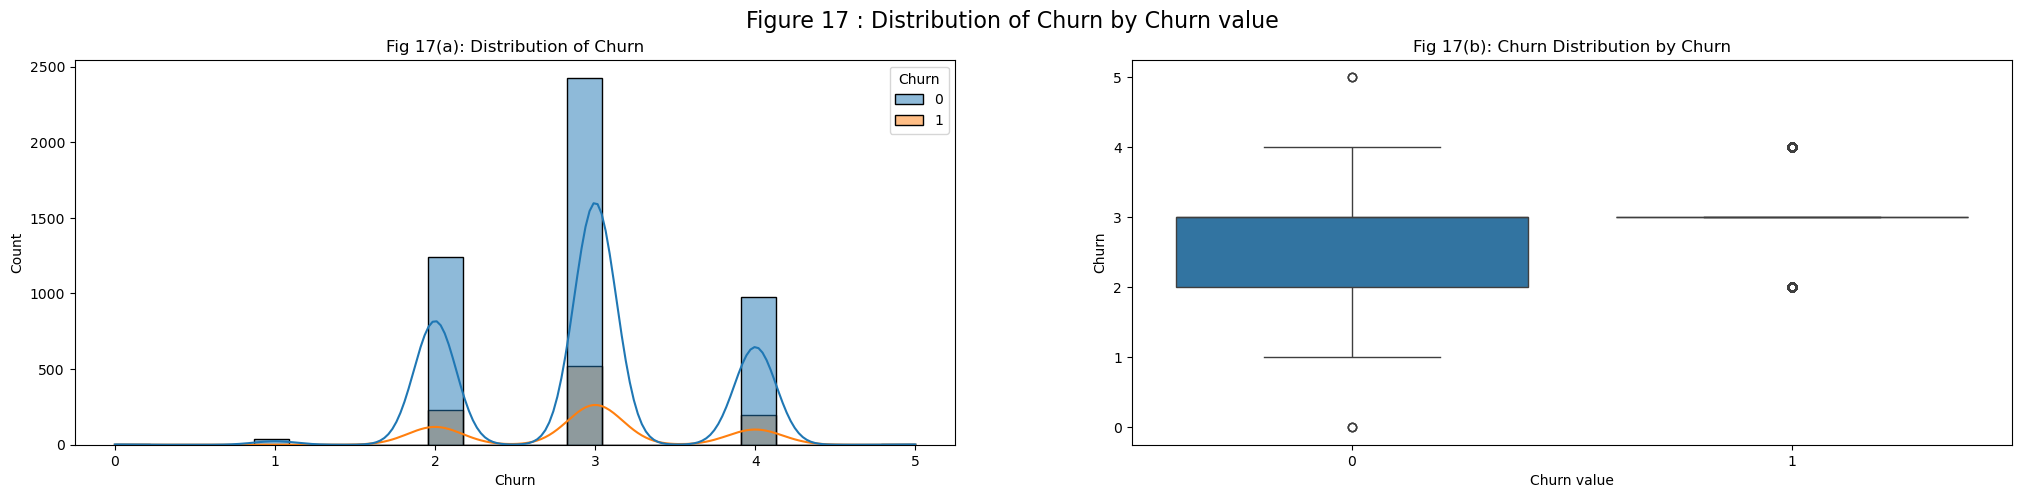

In [136]:
plot_numvar_churn('HourSpendOnApp', 'Churn', 23, 17)

In [115]:
df.groupby('Churn')['HourSpendOnApp'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,2.928663,0.711875,0.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0
1,948.0,2.964135,0.672888,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0


# OBSERVATION:

1.Distribution Overview: The statistics for HoursSpentOnApp indicate that non-churned customers (Churn = 0) have a mean of approximately 2.93 hours,      while churned customers (Churn = 1) have a slightly higher mean of about 2.96 hours. This suggests that churned customers, on average, spend more       time on the app compared to non-churned customers.

2.Variability in Hours: The standard deviation is relatively close between the two groups, with non-churned customers having a standard deviation of      0.71 and churned customers at 0.67. This indicates similar levels of variability in the hours spent on the app for both segments.

3.Range and Percentiles:

The minimum time spent on the app for non-churned customers is 0.0 hours, while churned customers have a minimum of 2.0 hours, indicating that some non-churned customers may have very limited engagement.

The maximum hours spent is 5.0 for non-churned customers and 4.0 for churned customers, showing that both groups have similar maximum engagement levels, though the maximum for non-churned customers is slightly higher.

The percentiles demonstrate that most customers spend between 2.0 to 4.0 hours, regardless of their churn status, with few customers exceeding this range.

4.Feature Relevance: Despite churned customers spending slightly more time on the app on average, the minimal differences in means and standard           deviations, along with the overlapping ranges, suggest that HoursSpentOnApp may not be a strong predictor for customer churn. Thus, this feature        might not significantly contribute to the churn prediction model.

# Total number of deceives is registered on particular customer : 'NumberOfDeviceRegistered'


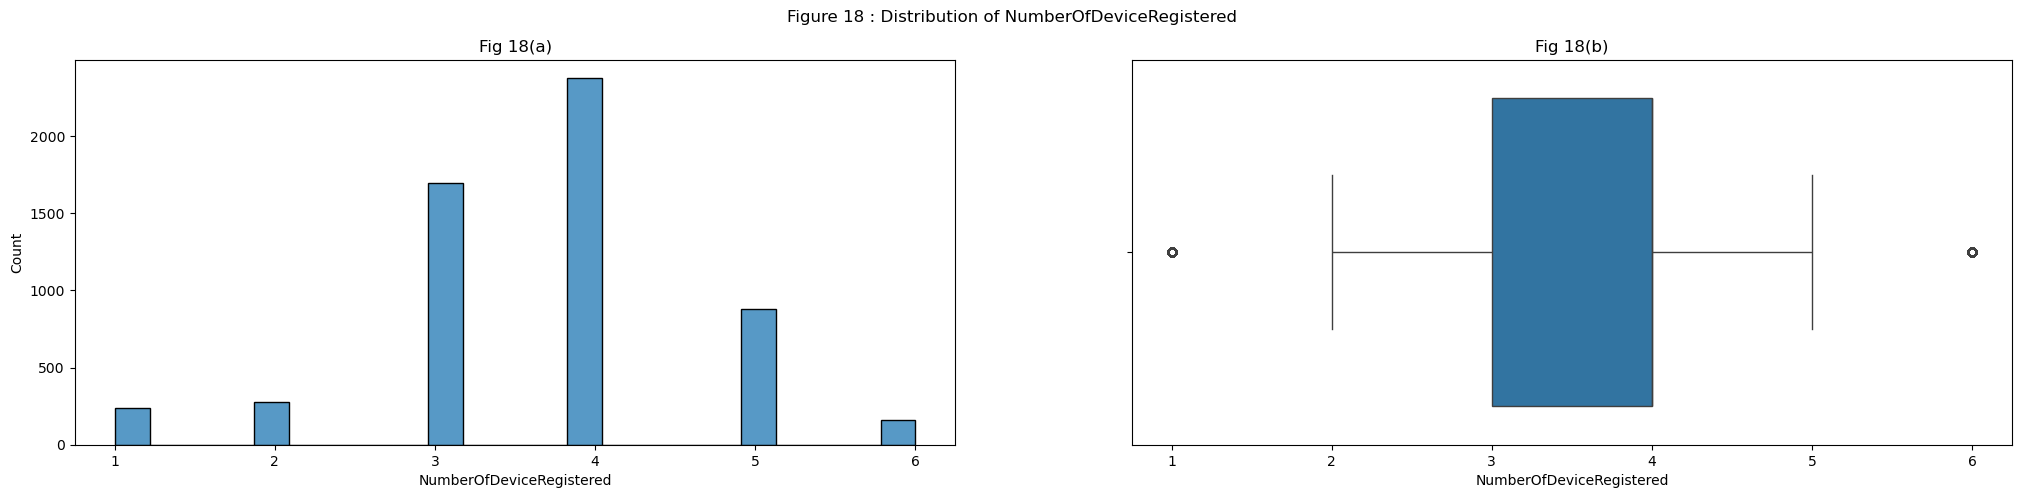

In [120]:
plot_num_var('NumberOfDeviceRegistered', 'Churn', 23, 18)

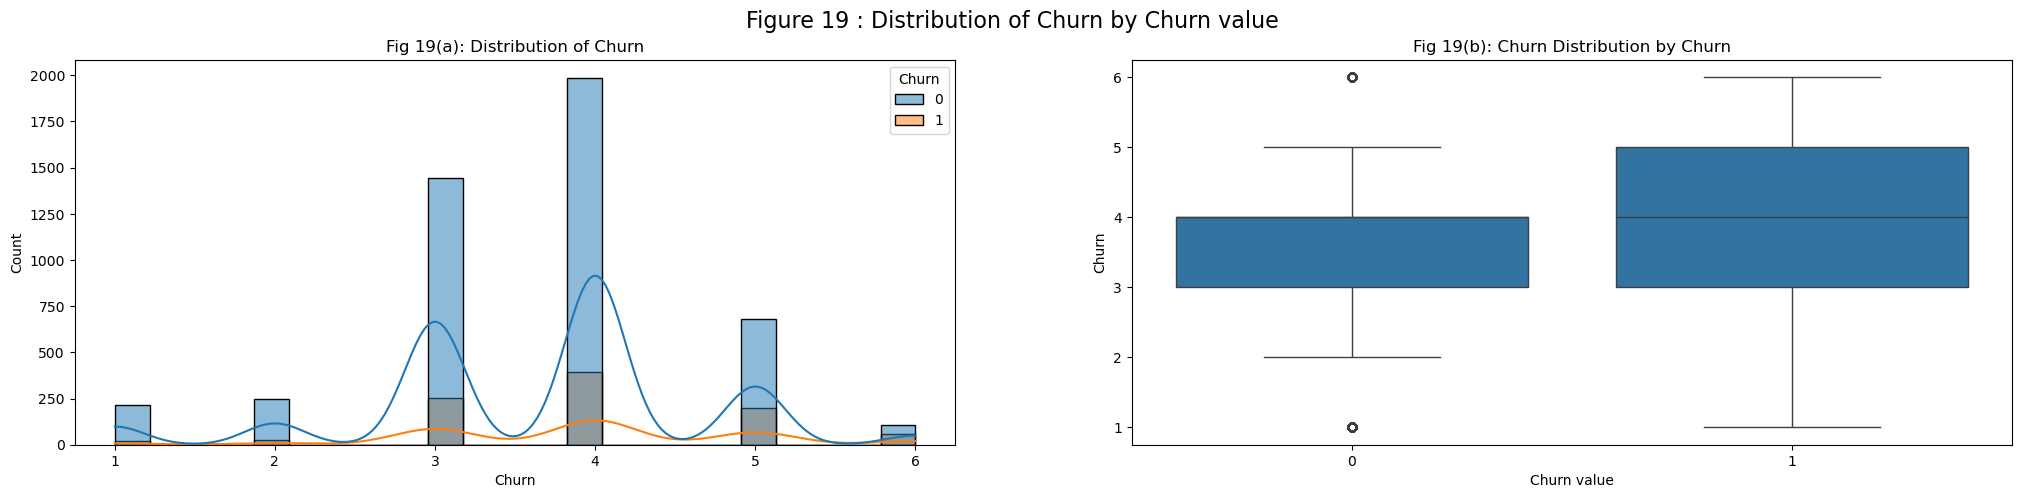

In [138]:
plot_numvar_churn('NumberOfDeviceRegistered', 'Churn', 23, 19)

In [124]:
df.groupby('Churn')['NumberOfDeviceRegistered'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,3.639257,1.018910,1.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,6.0,6.0
1,948.0,3.934599,1.014127,1.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,6.0,6.0


# OBSERVATION:

1.Distribution Overview: The NoOfRegisteredDevices shows a mean of approximately 3.64 for non-churned customers (Churn = 0) and 3.93 for churned          customers (Churn = 1), indicating churned customers register slightly more devices on average.

2.Variability: The standard deviation is similar for both groups, with non-churned customers at 1.02 and churned customers at 1.01, reflecting            consistent engagement across both segments.

3.Range and Percentiles: Both groups have a minimum of 1 device and a maximum of 6 devices. The percentiles suggest that most customers register          between 3 to 5 devices, with little difference in distribution patterns.

4.Feature Relevance: The small difference in means and similar distribution imply that NoOfRegisteredDevices may not be a strong predictor of churn, as   it does not significantly distinguish between churned and non-churned customers.

# Total number of addresses added on particular customer : 'NumberOfAddress

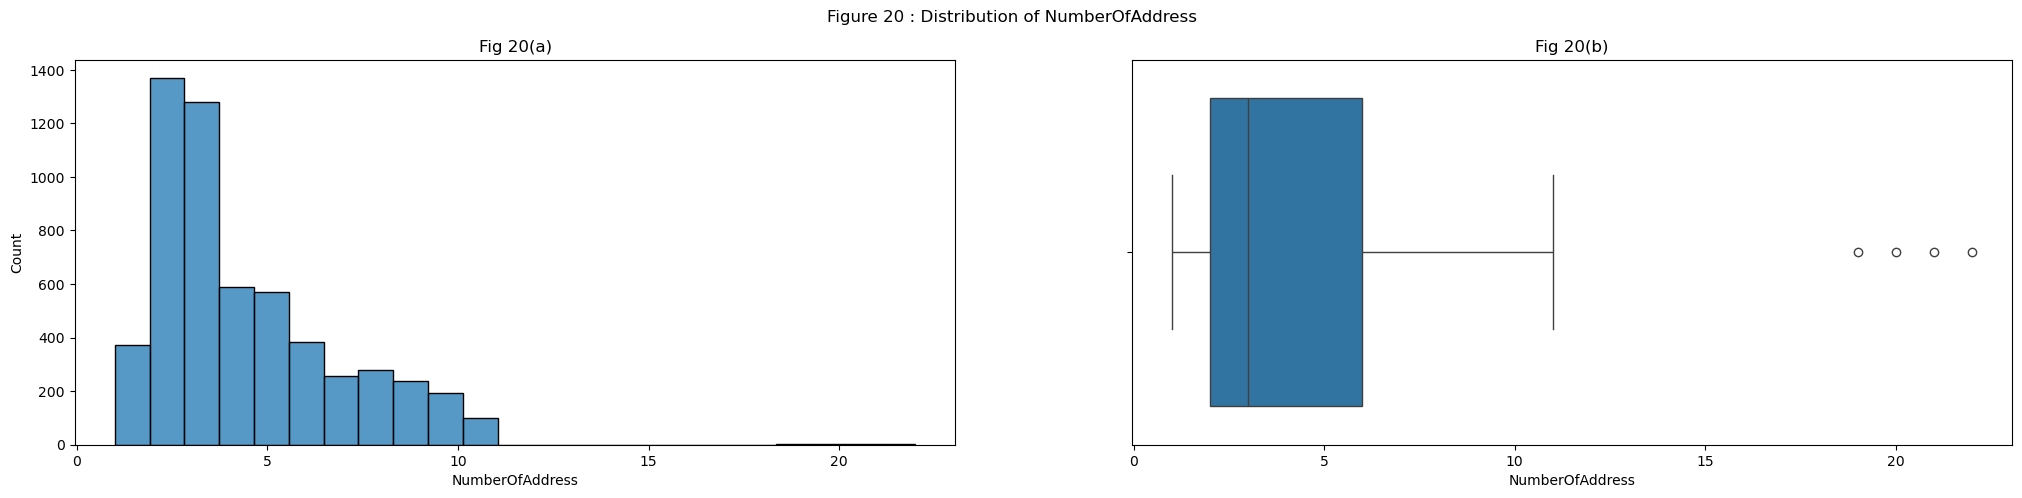

In [128]:
plot_num_var('NumberOfAddress', 'Churn', 23, 20)

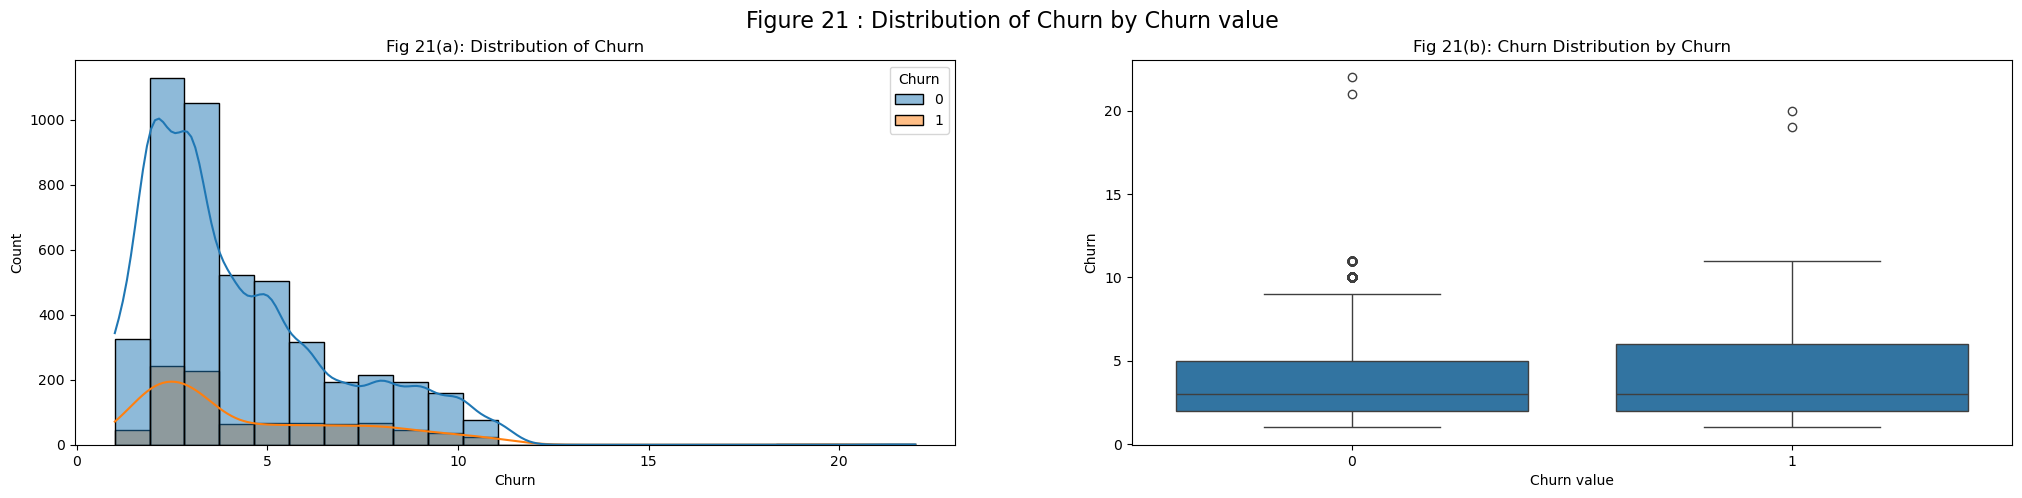

In [140]:
plot_numvar_churn('NumberOfAddress', 'Churn', 23, 21)

In [142]:
df.groupby('Churn')['NumberOfAddress'].describe(percentiles=percentiles)
     

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
Churn,,,,,,,,,,,,,,,,,
0,4682.0,4.162965,2.537001,1.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,5.0,5.0,6.0,8.0,11.0,22.0
1,948.0,4.466245,2.790071,1.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,6.0,6.0,7.0,9.0,11.0,20.0


# OBSERVATION:

1.Distribution Overview: Non-churned customers (Churn = 0) have a mean of 4.16 addresses, while churned customers (Churn = 1) have a slightly higher      mean of 4.47.

2.Variability: Both groups show similar variability, with standard deviations of 2.54 and 2.79, respectively.

3.Range and Percentiles: The minimum number of addresses is 1 for both groups, with maximums of 22 (non-churned) and 20 (churned). Most customers         register between 2 to 6 addresses.

4.Feature Relevance: The marginal difference in means and similar distribution suggest that Number of Addresses may not be a significant predictor of     churn.

# CATEGORICAL FEATURES

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage_distribution(data_frame, category_col, target_col, figure_num, x_axis_labels):
    # Define the variables for ease of use
    x = category_col
    y = target_col
    
    # Create a temporary DataFrame to hold percentage values
    percentage_data = (data_frame.groupby(x)[y]
                        .value_counts(normalize=True)
                        .mul(100)
                        .rename('percentage')
                        .reset_index())
    
    # Set the font size for better visibility
    sns.set(font_scale=1.5)

    # Generate the categorical plot (bar chart)
    plot = sns.catplot(x=x, y='percentage', hue=y, kind='bar', 
                       data=percentage_data, height=6, aspect=3)
    
    # Set custom x-axis labels
    plot.ax.set_xticklabels(x_axis_labels)
    plot.ax.set_ylim(0, 100)  # Set y-axis limits to percentage range

    # Annotate each bar with the percentage value
    for bar in plot.ax.patches:
        bar_height = bar.get_height()
        plot.ax.text(bar.get_x() + bar.get_width() / 2, 
                     bar_height, 
                     f'{bar_height:.1f}%', 
                     ha='center', 
                     va='bottom')  # Center the text above the bar

    # Set the title and axis labels
    plt.title(f'Figure {figure_num}(b): {category_col.title()} by Percentage of {target_col.title()}')
    plt.xlabel(category_col.title())
    plt.ylabel(f'{target_col.title()} Percentage', fontdict={'fontsize': 20})

    return plot


# Preferred login device of customer : 'PreferredLoginDevice'

In [153]:
df['PreferredLoginDevice'].unique()

array(['Mobile', 'Computer'], dtype=object)

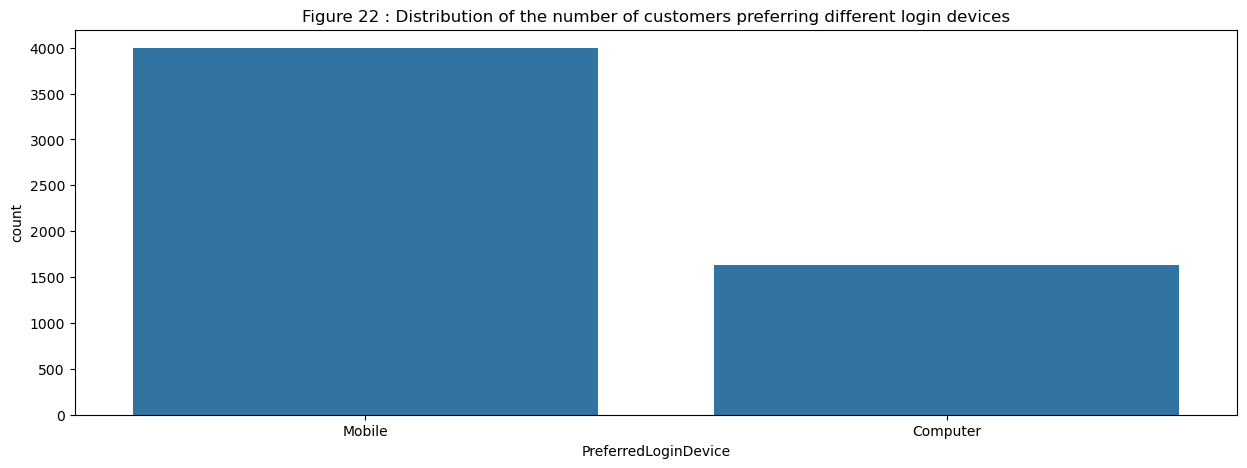

In [155]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='PreferredLoginDevice', data=df)
plt.title('Figure 22 : Distribution of the number of customers preferring different login devices')
plt.show()

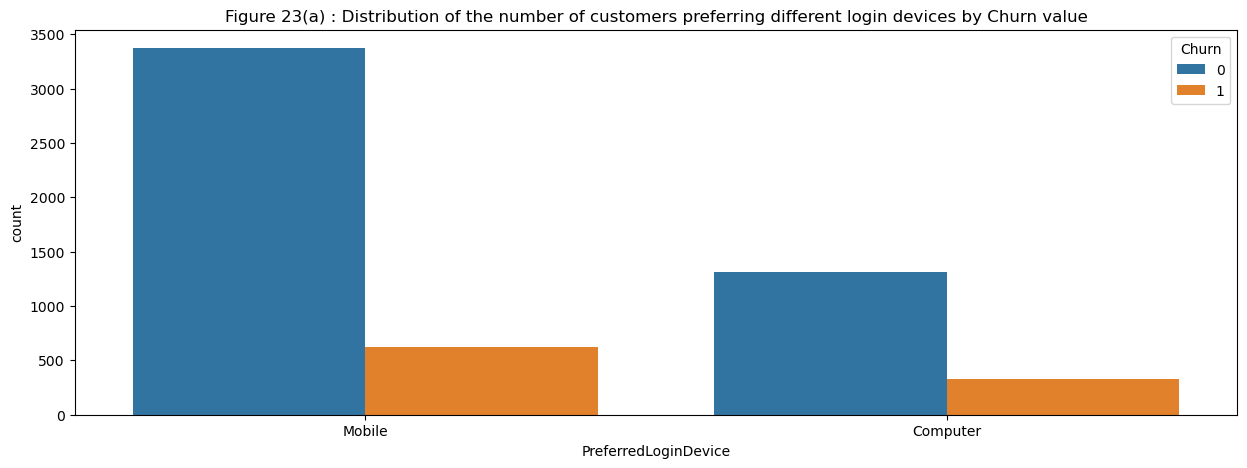

C:\Users\91932\AppData\Local\Temp\ipykernel_19408\644767241.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.ax.set_xticklabels(x_axis_labels)


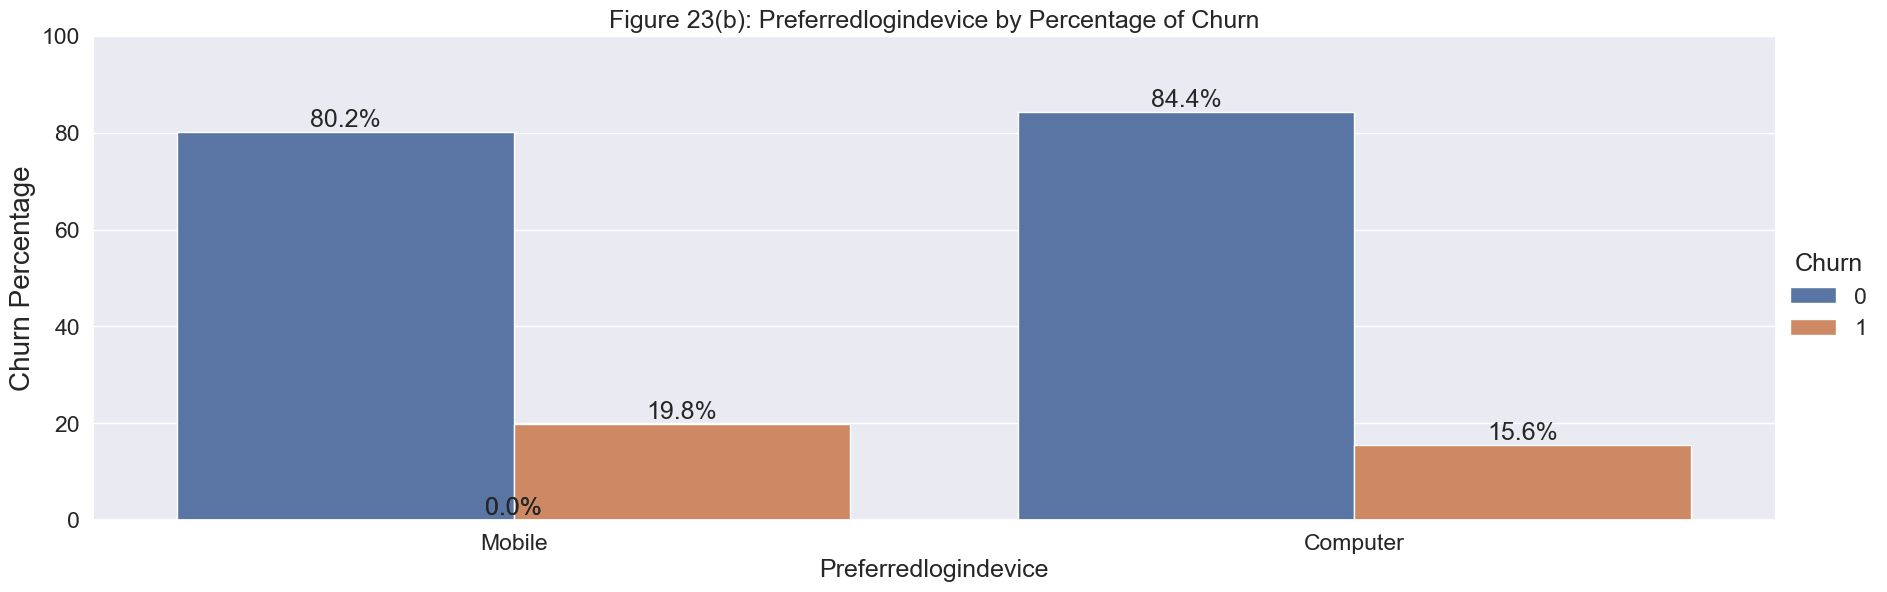

In [157]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='PreferredLoginDevice', hue='Churn', data=df)
plt.title('Figure 23(a) : Distribution of the number of customers preferring different login devices by Churn value')
plt.show()

plot_percentage_distribution(df, 'PreferredLoginDevice', 'Churn', 23, df.PreferredLoginDevice.unique())

# Observations:

1.Device Preference: The majority of customers choose mobile phones for logging into the e-commerce app.

2.Churn Analysis: The percentage plot shows that the churn rates are nearly identical across all categories of PreferredLoginDevice.

3.Predictor Significance: Given the similar proportions of churned and non-churned customers, it is likely that PreferredLoginDevice does not serve as    a valuable predictor variable for our model.

# Tier type of the city the customer is living in : 'CityTier'

In [163]:
df['CityTier'].unique()

array([3, 1, 2], dtype=int64)

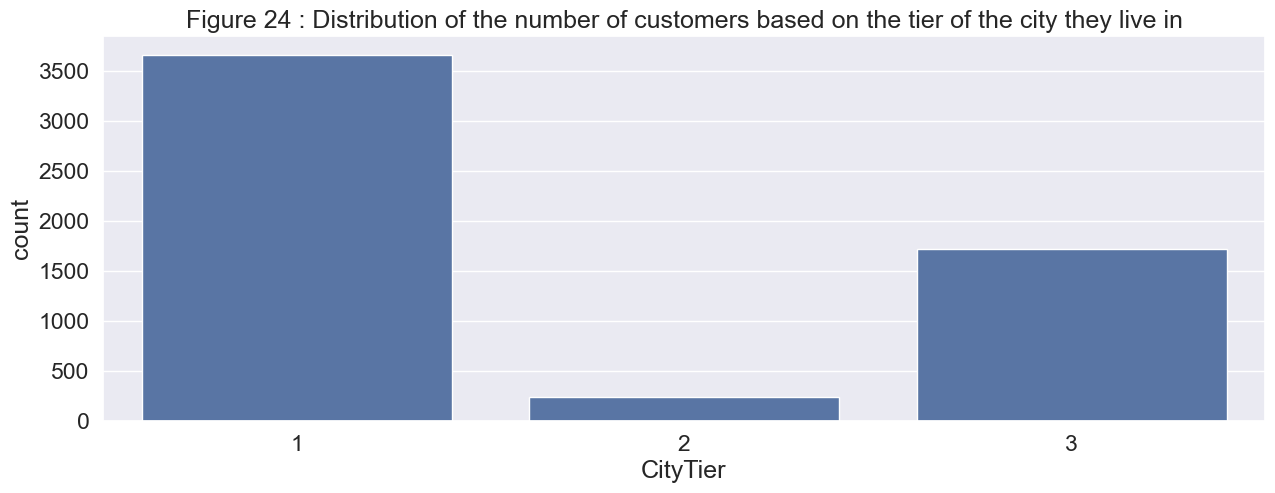

In [165]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='CityTier', data=df)
plt.title('Figure 24 : Distribution of the number of customers based on the tier of the city they live in')
plt.show()

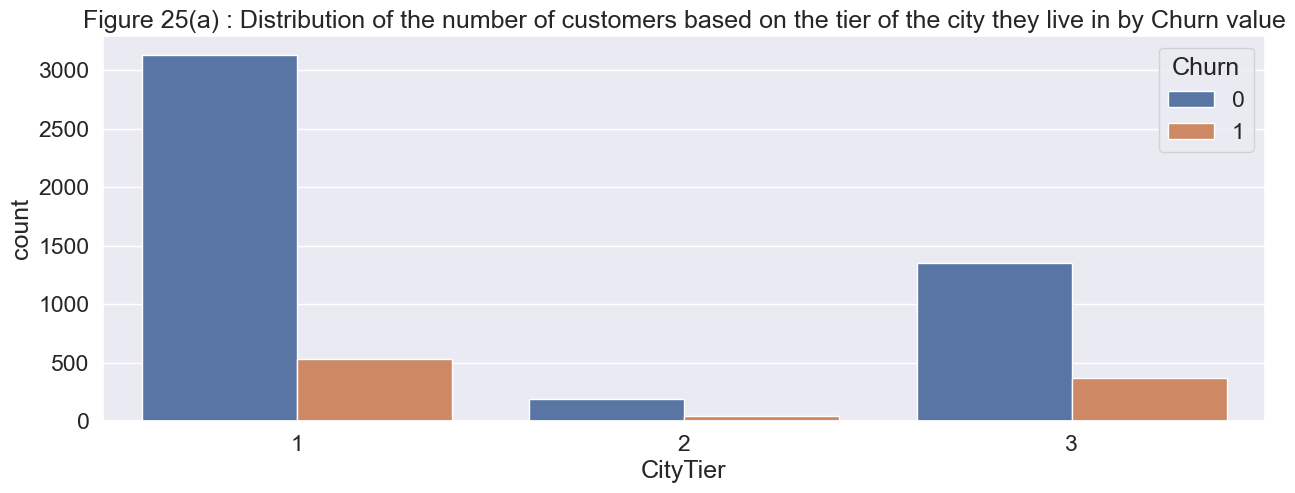

C:\Users\91932\AppData\Local\Temp\ipykernel_19408\644767241.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.ax.set_xticklabels(x_axis_labels)


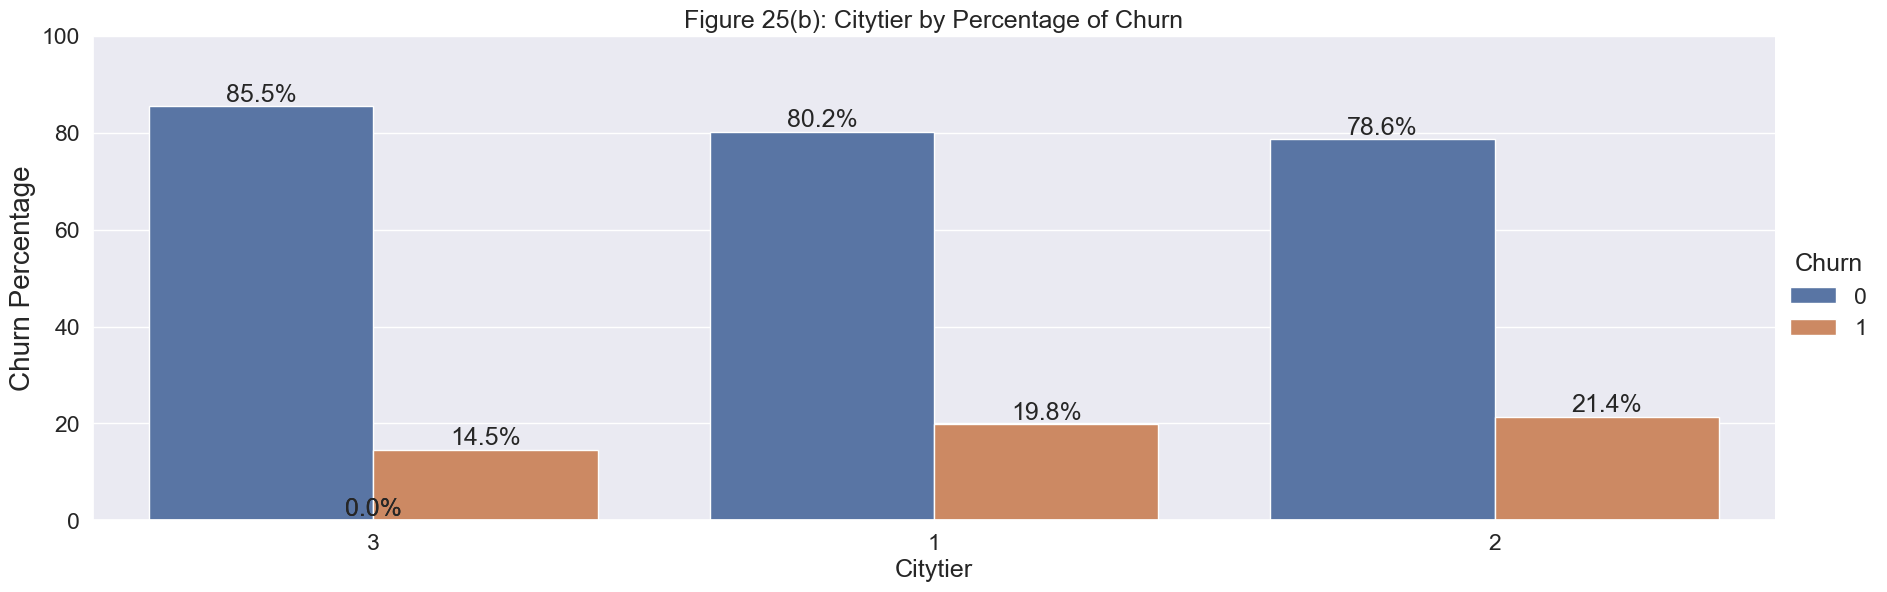

In [167]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='CityTier', hue='Churn', data=df)
plt.title('Figure 25(a) : Distribution of the number of customers based on the tier of the city they live in by Churn value')
plt.show()

plot_percentage_distribution(df, 'CityTier', 'Churn', 25, df.CityTier.unique())

# OBSERVATION:

1.City Distribution: The majority of customers reside in Tier 1 cities, with the fewest customers living in Tier 2 cities.

2.Churn Analysis by City Tier: The percentage plot indicates that the churn rate is lower among customers from Tier 3 cities compared to those from       Tier 1 and Tier 2.

3.Predictor Potential: Based on these observations, it is reasonable to conclude that CityTier may serve as a valuable predictor variable for our model.

# Preferred payment method of customer : 'PreferredPaymentMode'

In [172]:
df['PreferredPaymentMode'].unique()
     

array(['DC', 'UPI', 'CC', 'COD', 'E wallet'], dtype=object)

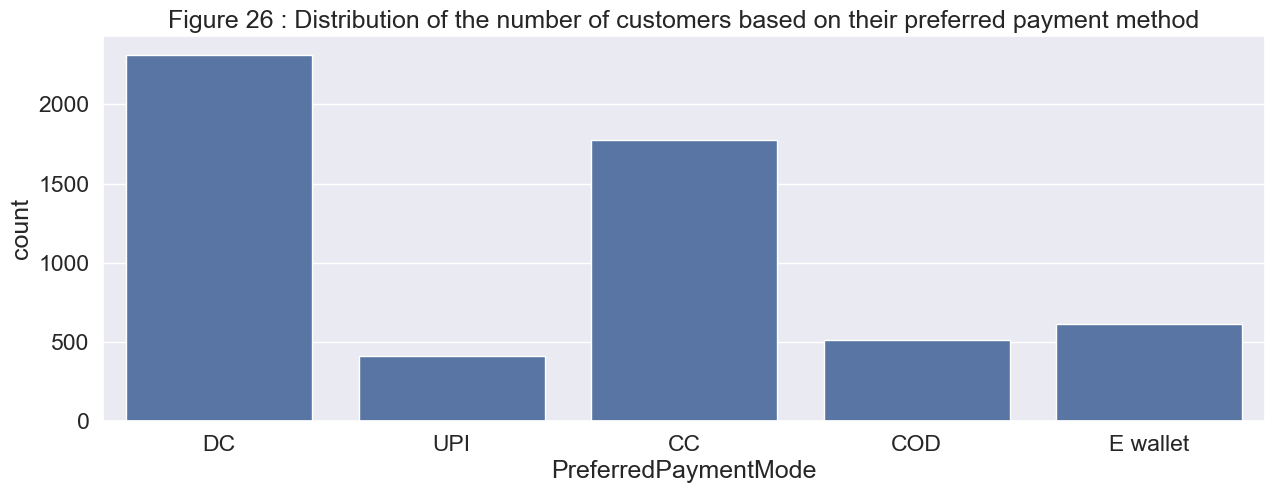

In [180]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='PreferredPaymentMode', data=df)
plt.title('Figure 26 : Distribution of the number of customers based on their preferred payment method')
plt.show()

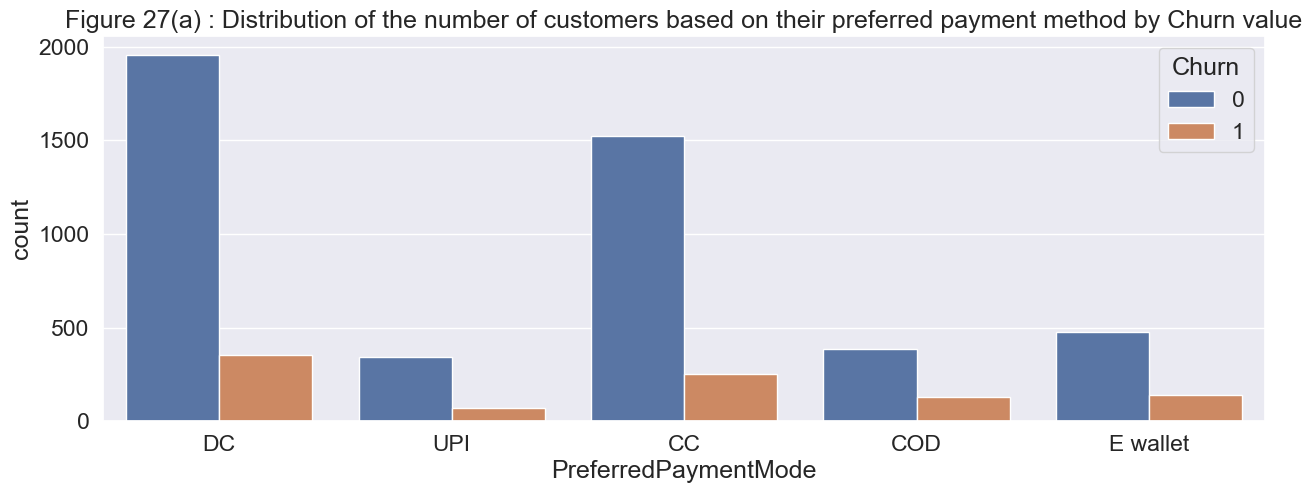

C:\Users\91932\AppData\Local\Temp\ipykernel_19408\644767241.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.ax.set_xticklabels(x_axis_labels)


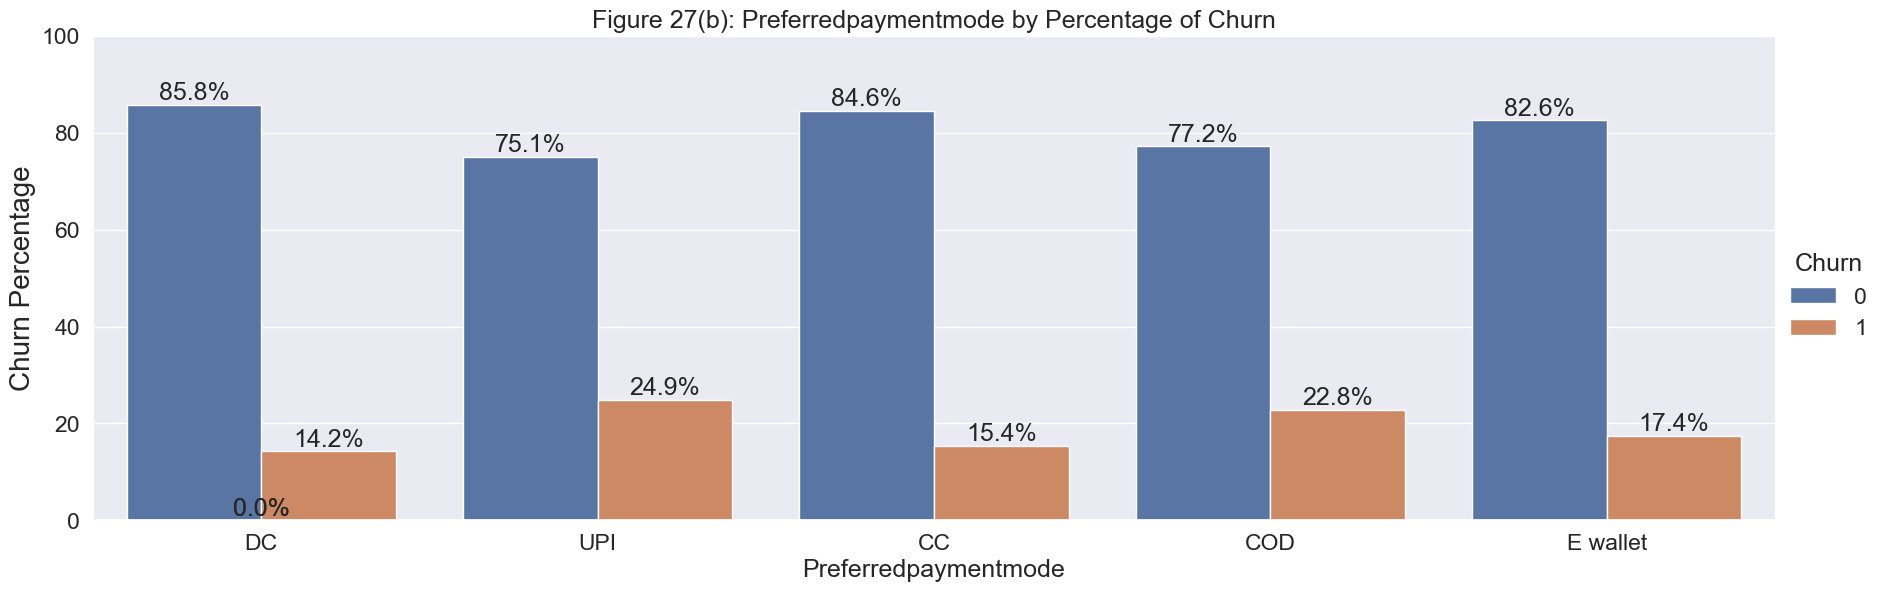

In [182]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='PreferredPaymentMode', hue='Churn', data=df)
plt.title('Figure 27(a) : Distribution of the number of customers based on their preferred payment method by Churn value')
plt.show()

plot_percentage_distribution(df, 'PreferredPaymentMode', 'Churn', 27, df.PreferredPaymentMode.unique())
     

# Observations:

1.Payment Preference: A significant majority of customers opt for debit or credit cards as their preferred payment methods.

2.Churn Analysis by Payment Mode: The percentage plot reveals that customers using debit and credit cards exhibit a lower churn rate compared to those utilizing other payment methods.

3.Predictor Potential: Given these insights, it is reasonable to conclude that PreferredPaymentMode may serve as a valuable predictor variable for our model.

# Gender of customer : 'Gender'

In [187]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [189]:
df['Gender'].value_counts()

Gender
Male      3384
Female    2246
Name: count, dtype: int64

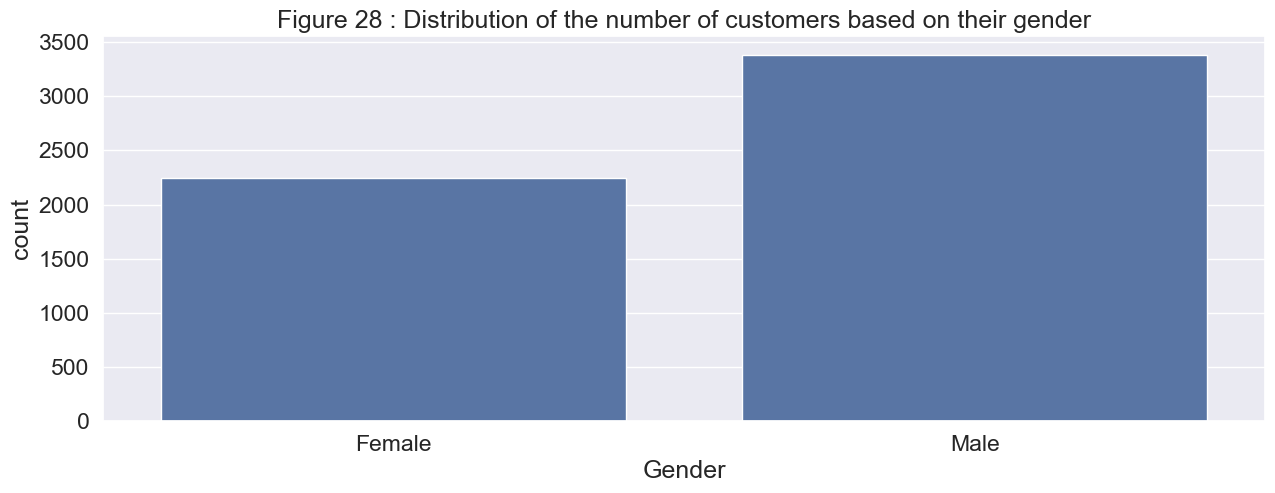

In [191]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='Gender', data=df)
plt.title('Figure 28 : Distribution of the number of customers based on their gender')
plt.show()
     

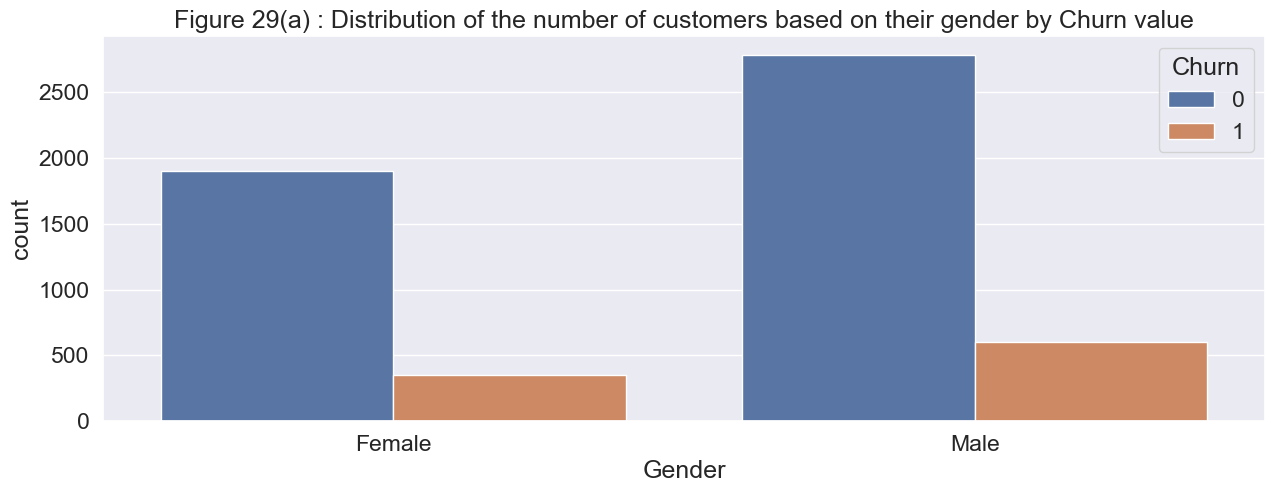

C:\Users\91932\AppData\Local\Temp\ipykernel_19408\644767241.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.ax.set_xticklabels(x_axis_labels)


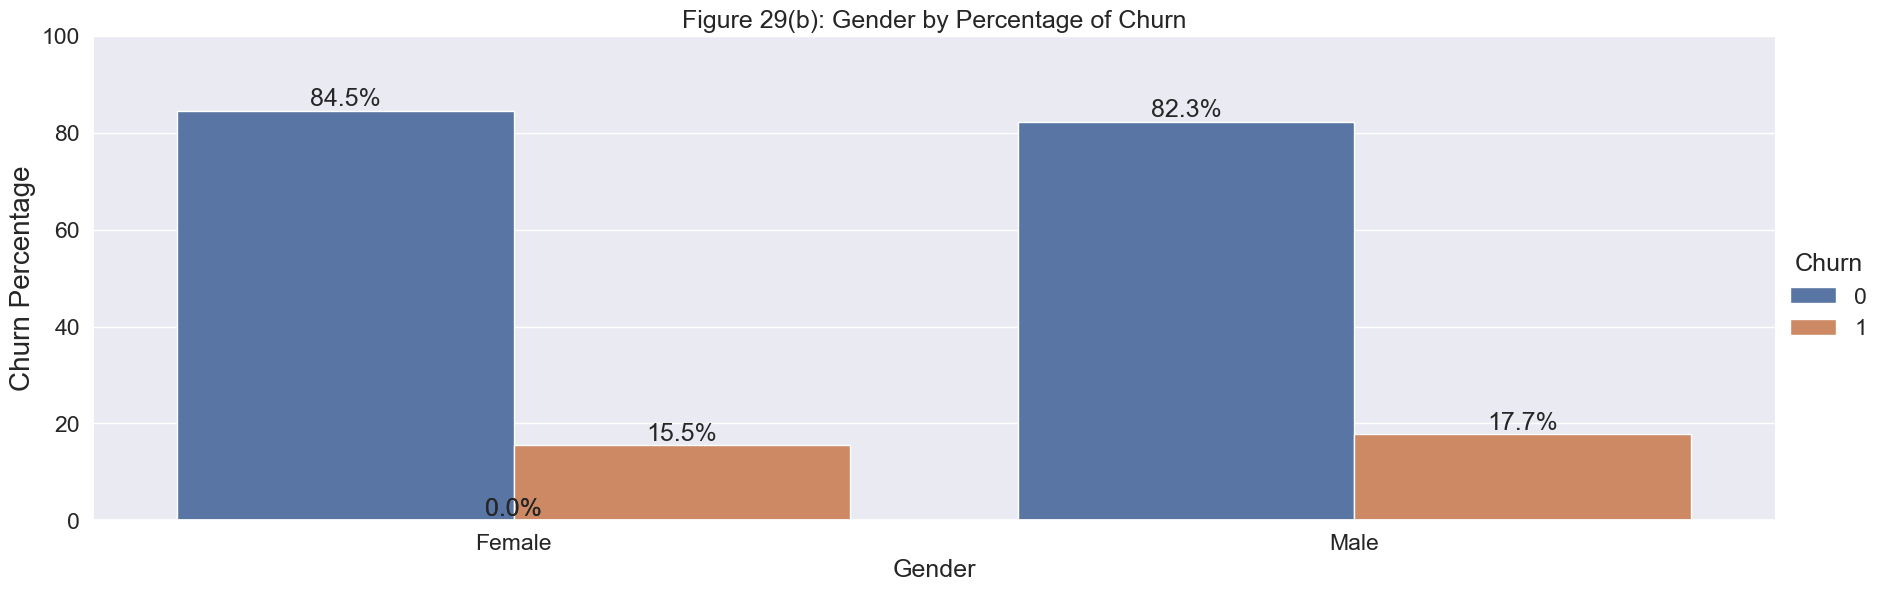

In [193]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='Gender', hue='Churn', data=df)
plt.title('Figure 29(a) : Distribution of the number of customers based on their gender by Churn value')
plt.show()

plot_percentage_distribution(df, 'Gender', 'Churn', 29, df.Gender.unique())
     

# Observations:

1.Gender Distribution: The customer base consists of a higher number of male customers compared to female customers.

2.Churn Analysis by Gender: The percentage plot indicates that the churn rates for both male and female customers are nearly identical, showing similar   levels of churn across genders.

3.Predictor Potential: Based on this analysis, it can be inferred that Gender is unlikely to be a strong predictor variable for our model.

# Preferred order category of customer in last month : 'PreferedOrderCat'

In [198]:
df['PreferedOrderCat'].unique()

array(['Laptop', 'Mobile', 'Others', 'Fashion', 'Grocery'], dtype=object)

In [200]:
df.PreferedOrderCat.value_counts()

PreferedOrderCat
Mobile     2080
Laptop     2050
Fashion     826
Grocery     410
Others      264
Name: count, dtype: int64

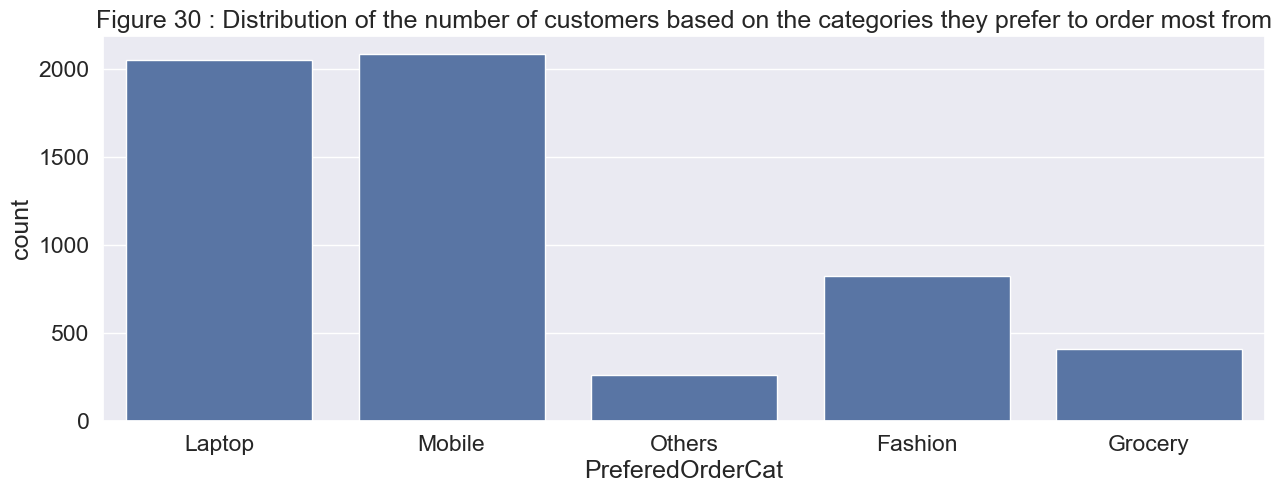

In [202]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='PreferedOrderCat', data=df)
plt.title('Figure 30 : Distribution of the number of customers based on the categories they prefer to order most from')
plt.show()

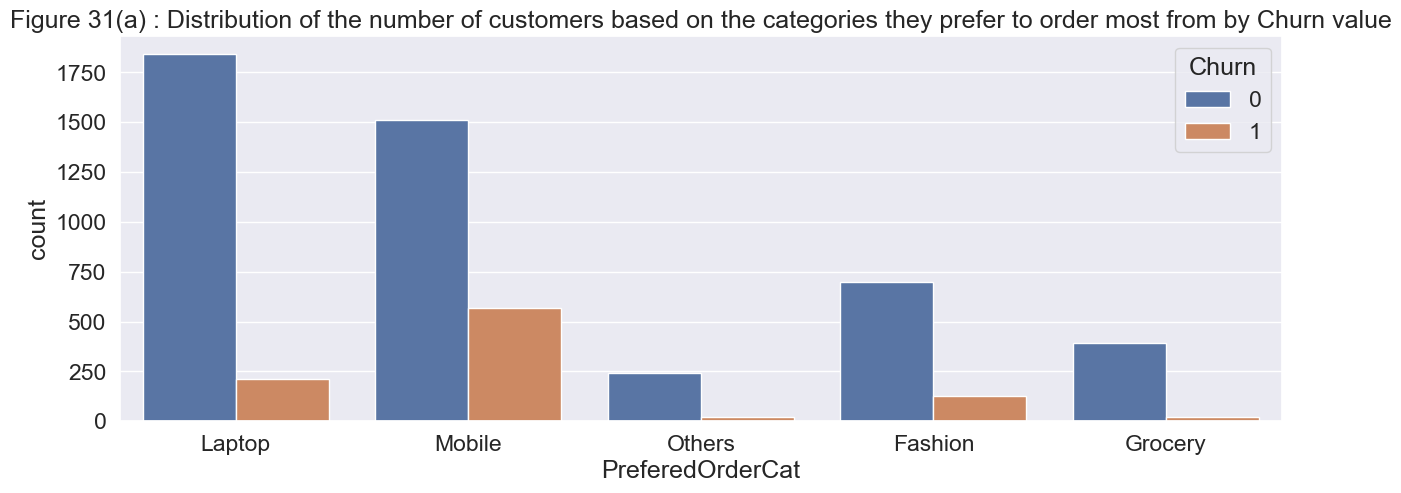

C:\Users\91932\AppData\Local\Temp\ipykernel_19408\644767241.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.ax.set_xticklabels(x_axis_labels)


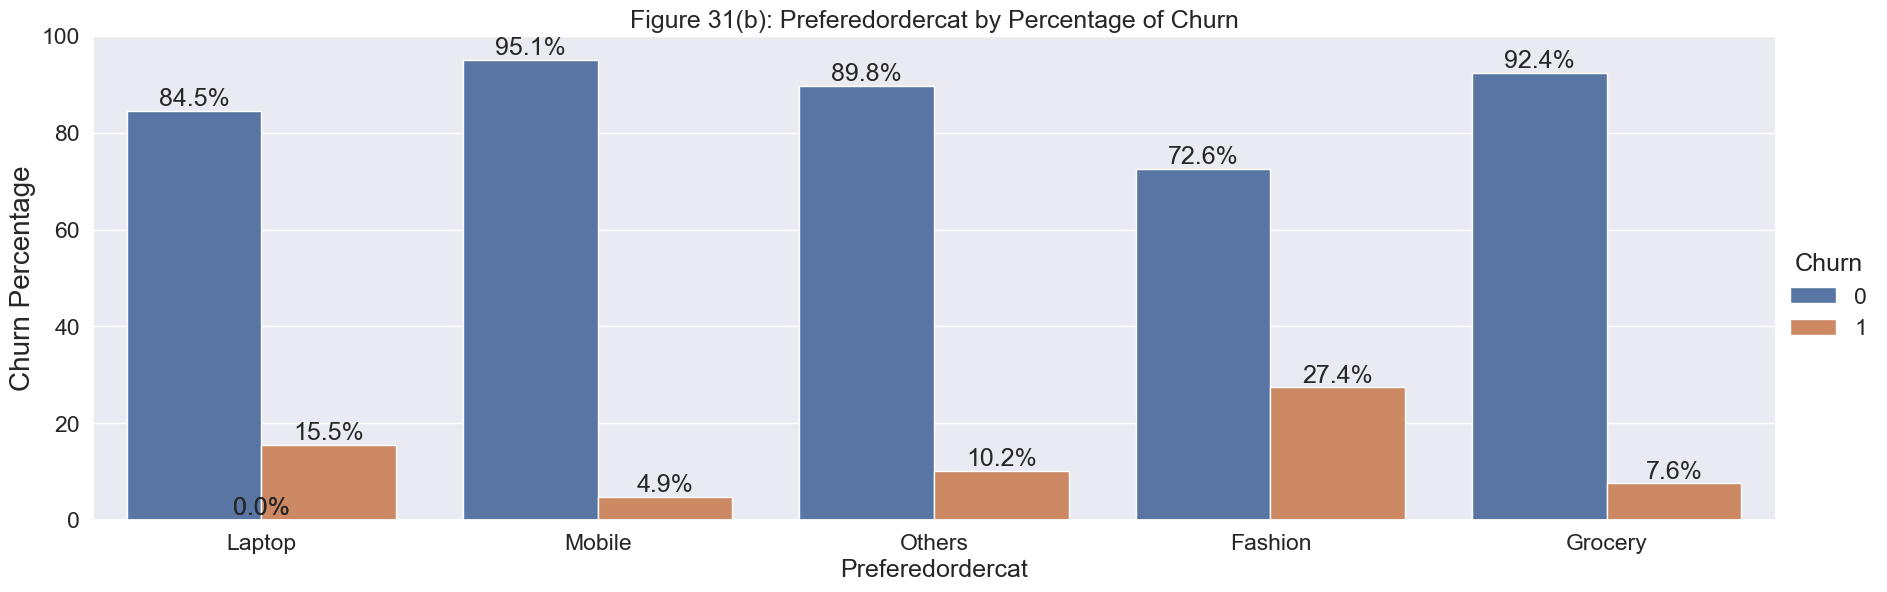

In [204]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='PreferedOrderCat', hue='Churn', data=df)
plt.title('Figure 31(a) : Distribution of the number of customers based on the categories they prefer to order most from by Churn value')
plt.show()

plot_percentage_distribution(df, 'PreferedOrderCat', 'Churn', 31, df.PreferedOrderCat.unique())
     

# Observations:

1.Order Category Preference: The majority of customers tend to place most of their orders in either the laptop or mobile categories.

2.Churn Analysis by Order Category: The percentage plot reveals that customers ordering primarily from the fashion category have the highest churn        rates, whereas those ordering from the mobile and grocery categories exhibit lower churn rates. This indicates a clear disparity in churn percentages   across different categories.

3.Predictor Potential: Given these insights, it is reasonable to conclude that PreferredOrderCat may serve as a valuable predictor variable for our       model.

# Satisfactory score of customer on service : 'SatisfactionScore'

In [208]:
df['SatisfactionScore'].unique()

array([2, 3, 5, 4, 1], dtype=int64)

In [210]:
df.SatisfactionScore.value_counts()

SatisfactionScore
3    1698
1    1164
5    1108
4    1074
2     586
Name: count, dtype: int64

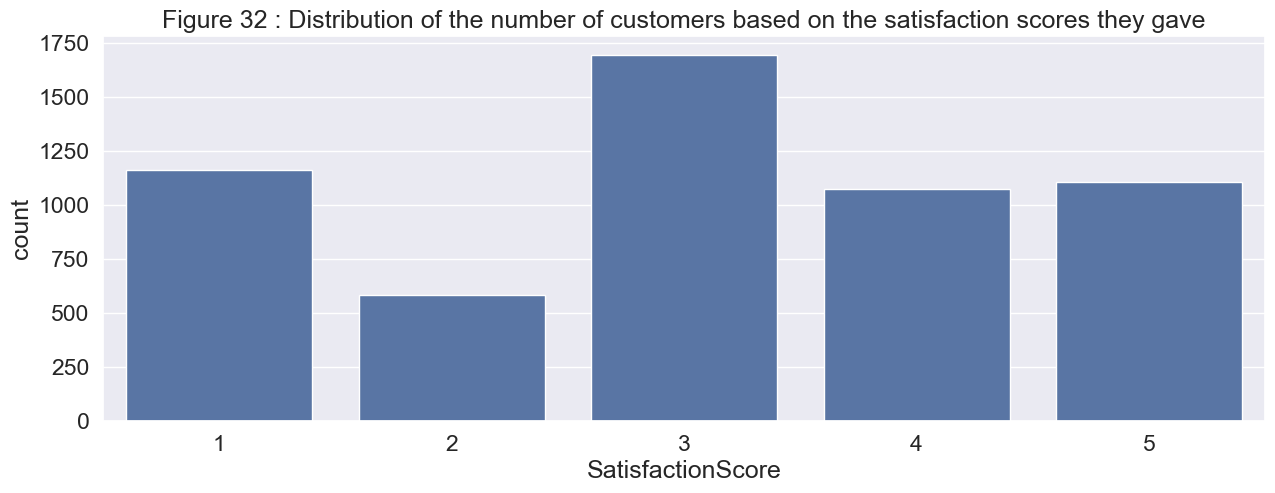

In [212]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='SatisfactionScore', data=df)
plt.title('Figure 32 : Distribution of the number of customers based on the satisfaction scores they gave')
plt.show()

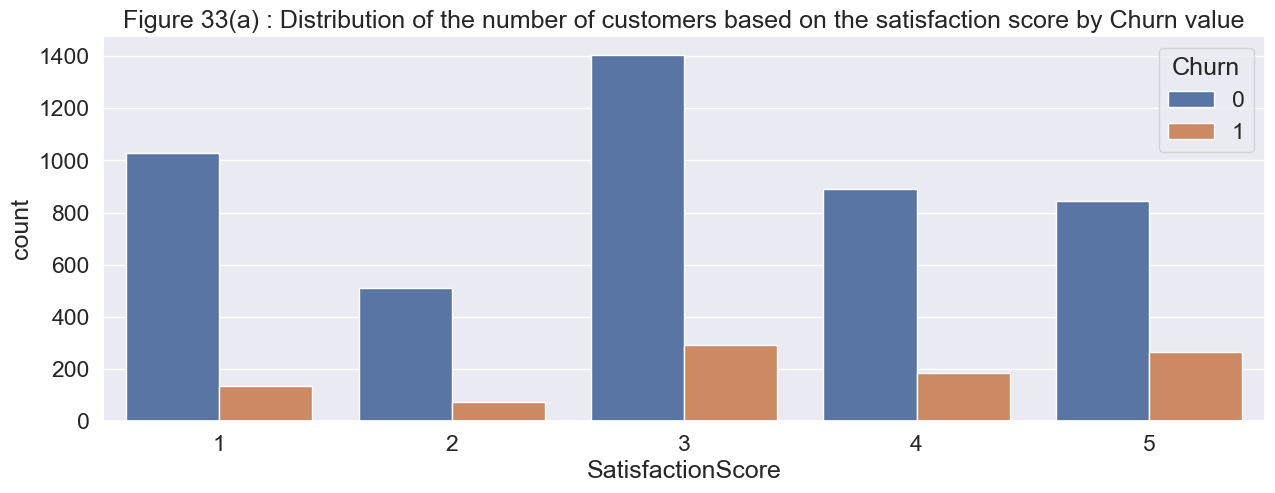

C:\Users\91932\AppData\Local\Temp\ipykernel_19408\644767241.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.ax.set_xticklabels(x_axis_labels)


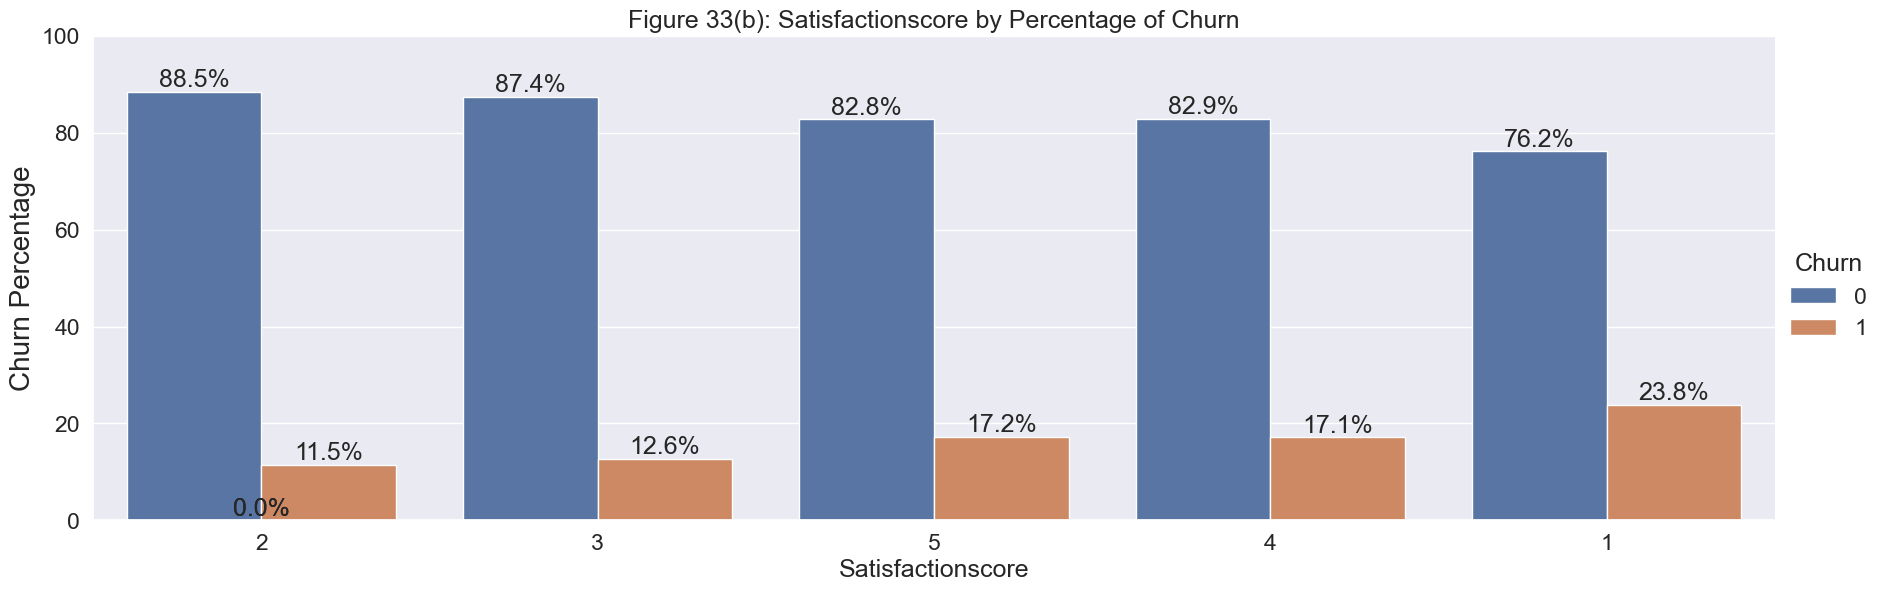

In [214]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='SatisfactionScore', hue='Churn', data=df)
plt.title('Figure 33(a) : Distribution of the number of customers based on the satisfaction score by Churn value')
plt.show()

plot_percentage_distribution(df, 'SatisfactionScore', 'Churn', 33, df.SatisfactionScore.unique())
     

# Observations:

1.Satisfaction Score Distribution: Most customers awarded an average satisfaction score of 3, followed by combined good scores of 4 and 5. The score of   2 was given the least.

2.Churn Analysis by Satisfaction Score: The percentage plot indicates that customers giving a score of 1 have the highest churn percentage, which         aligns with expectations. Interestingly, customers who rated their satisfaction as good (scores of 4 and 5) also show significant churn rates, almost   as high as those giving the lowest score.

3.Score of 2 Insights: Although the fewest customers awarded a score of 2, this group also recorded the lowest churn percentage among the five scores.

4.Churn Variability Across Scores: There is a notable difference in churn percentages across the various satisfaction score categories.

5.Predictor Potential: Based on these observations, it is reasonable to infer that SatisfactionScore could be a valuable predictor variable for our model.

# Marital status of customer : 'MaritalStatus'

In [218]:
df['MaritalStatus'].unique()
     

array(['Single', 'Divorced', 'Married'], dtype=object)

In [220]:
df.MaritalStatus.value_counts()

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64

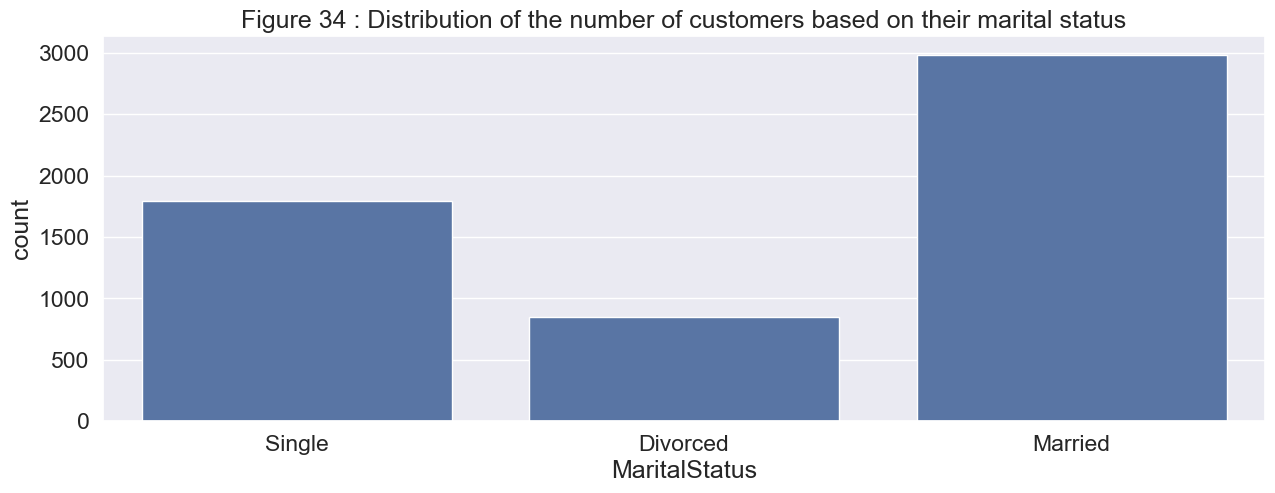

In [222]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='MaritalStatus', data=df)
plt.title('Figure 34 : Distribution of the number of customers based on their marital status')
plt.show()

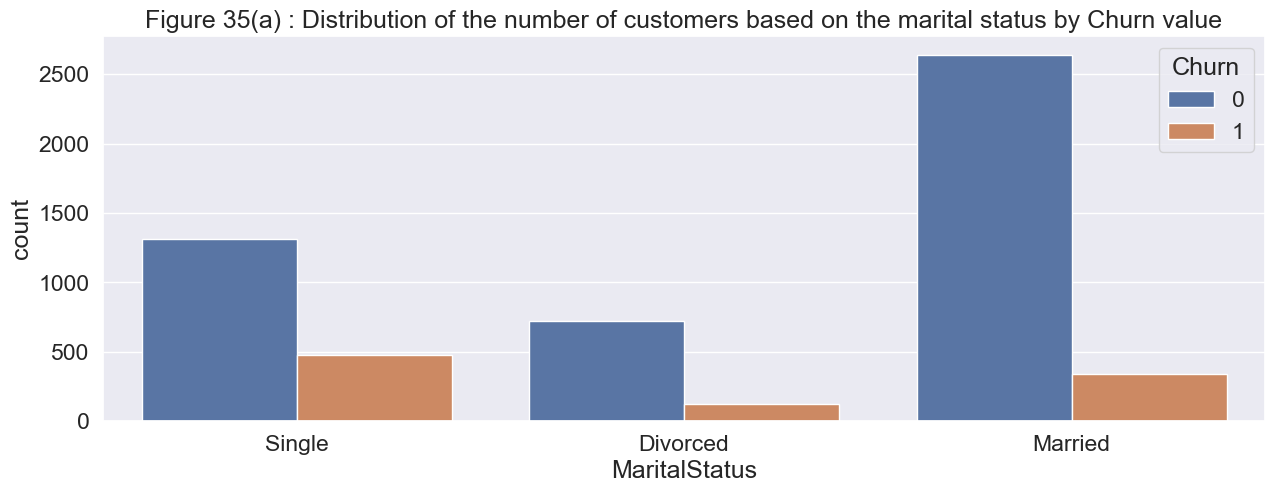

C:\Users\91932\AppData\Local\Temp\ipykernel_19408\644767241.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.ax.set_xticklabels(x_axis_labels)


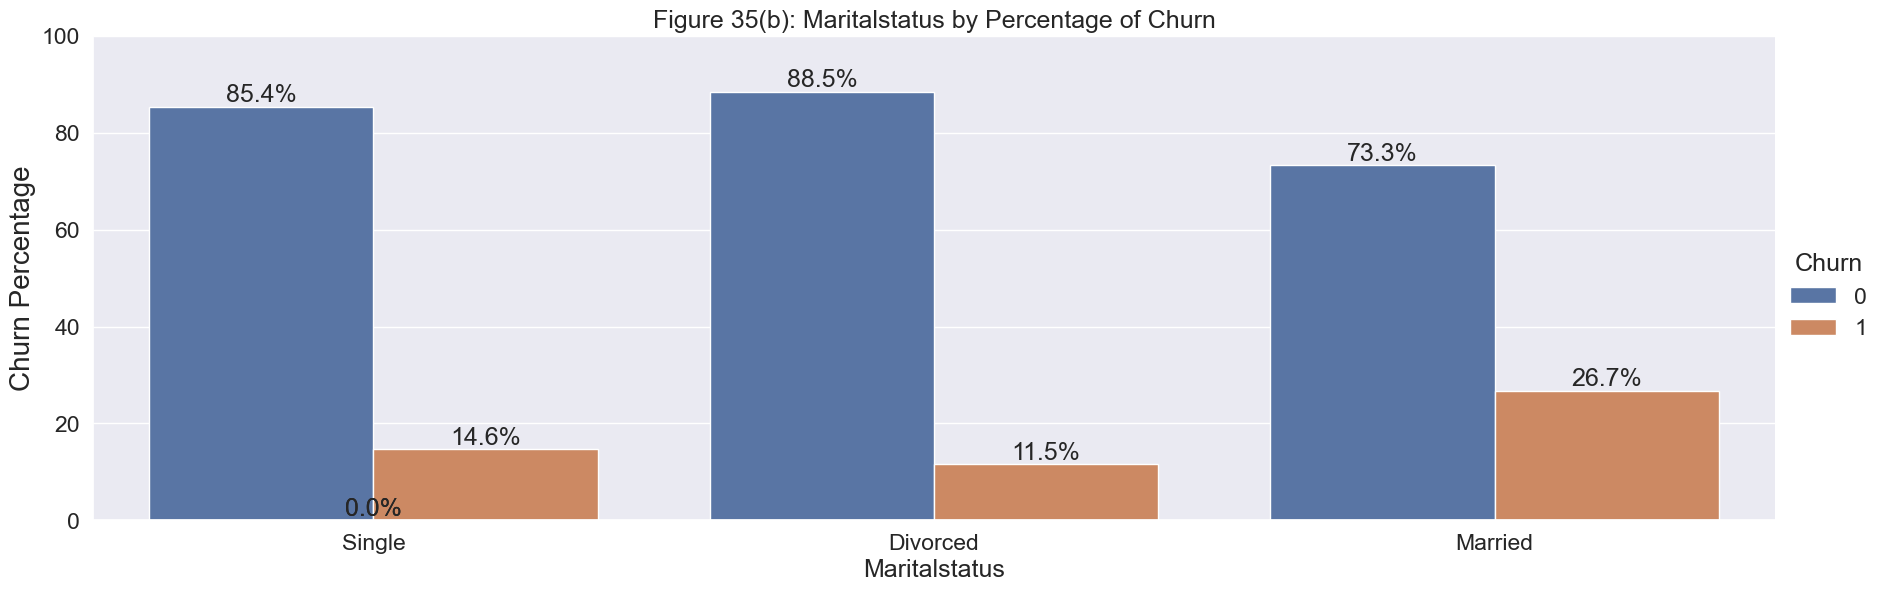

In [224]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='MaritalStatus', hue='Churn', data=df)
plt.title('Figure 35(a) : Distribution of the number of customers based on the marital status by Churn value')
plt.show()

plot_percentage_distribution(df, 'MaritalStatus', 'Churn', 35, df.MaritalStatus.unique())

# Observations:

1.Marital Status Distribution: The majority of customers are married.

2.Churn Analysis by Marital Status: When analyzing churn values through the percentage plot, it becomes evident that married customers have the highest   churn rates.

3.Churn Variability Across Categories: There is a clear distinction in churn percentages across different marital status categories.

4.Predictor Potential: Given these findings, we can reasonably conclude that MaritalStatus may serve as a significant predictor variable for our model.

# Any complaint has been raised in last month : 'Complain'

In [228]:
df['Complain'].unique()

array([1, 0], dtype=int64)

In [230]:
df.Complain.value_counts()

Complain
0    4026
1    1604
Name: count, dtype: int64

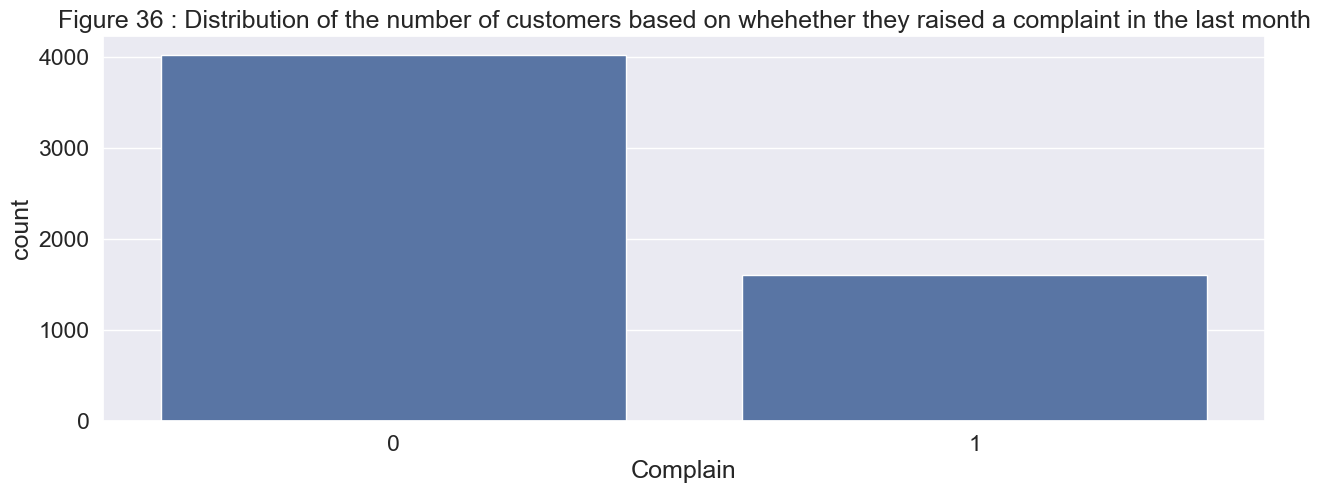

In [232]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='Complain', data=df)
plt.title('Figure 36 : Distribution of the number of customers based on whehether they raised a complaint in the last month')
plt.show()

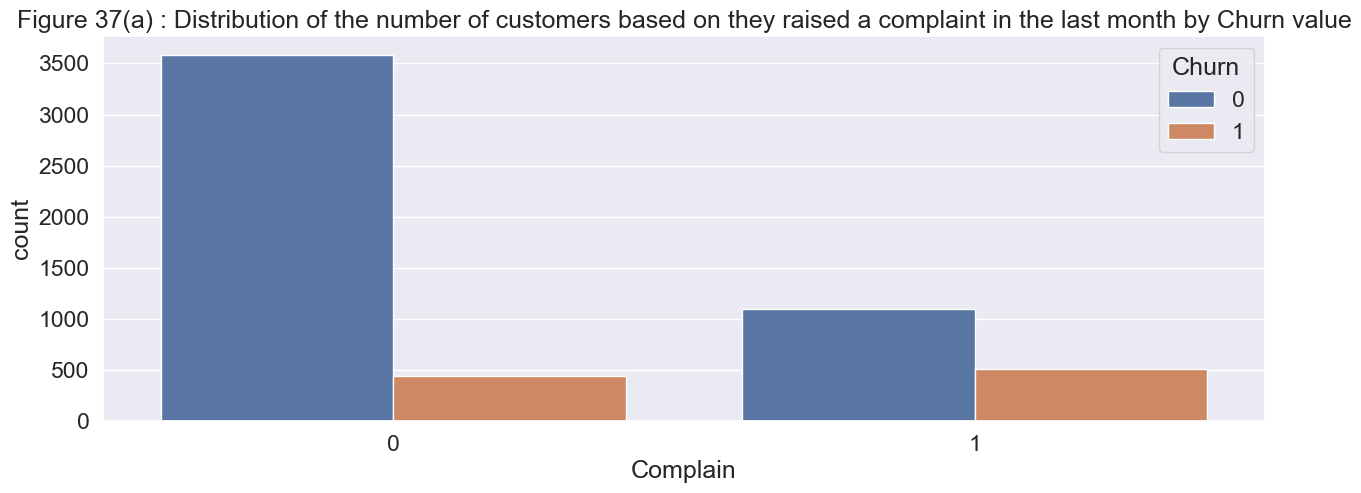

C:\Users\91932\AppData\Local\Temp\ipykernel_19408\644767241.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.ax.set_xticklabels(x_axis_labels)


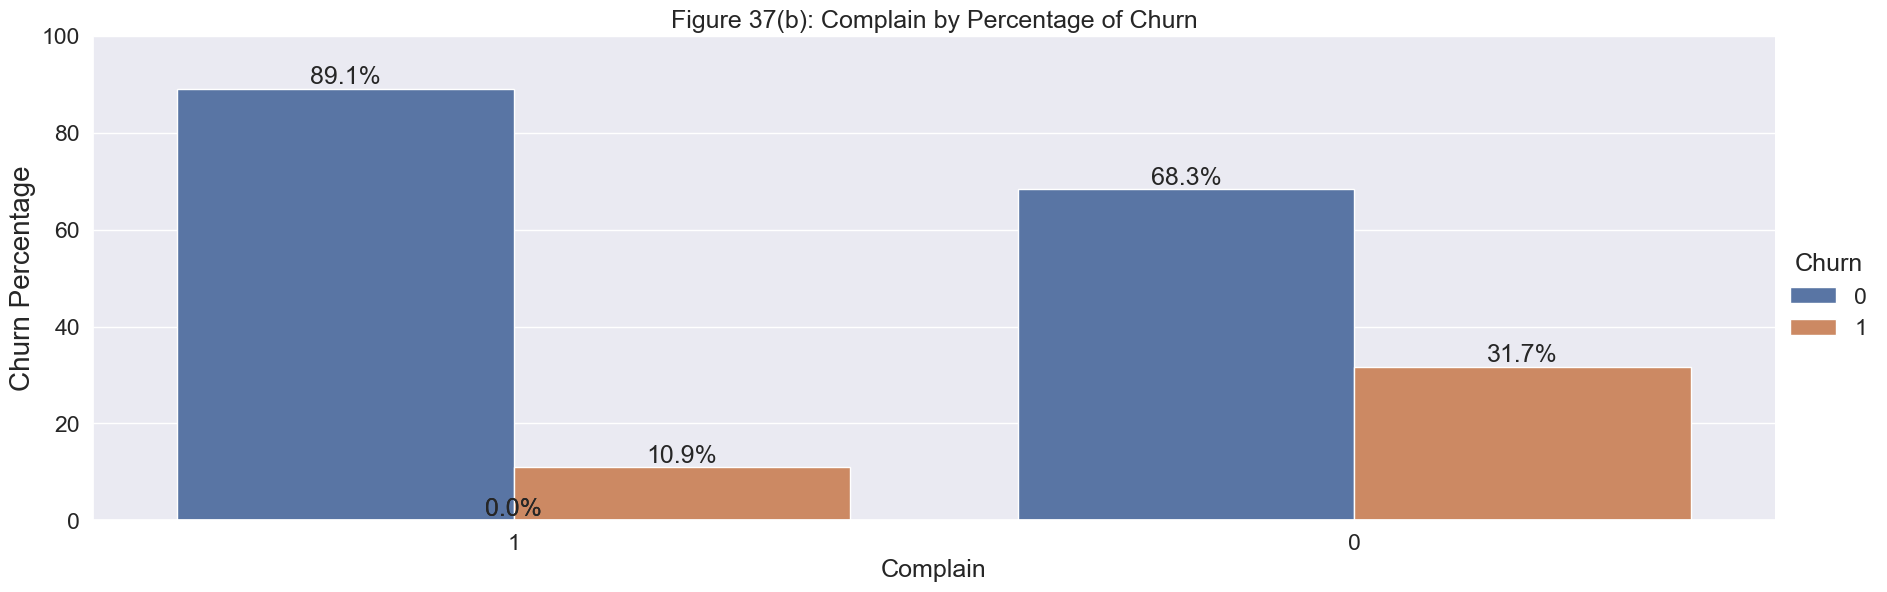

In [234]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='Complain', hue='Churn', data=df)
plt.title('Figure 37(a) : Distribution of the number of customers based on they raised a complaint in the last month by Churn value')
plt.show()

plot_percentage_distribution(df, 'Complain', 'Churn', 37, df.Complain.unique())
     

# Observations:

1.Complaint Frequency: The number of customers who raised complaints in the last month is lower than those who did not.

2.Churn Analysis by Complaints: Examining the churn values through the percentage plot reveals that customers who complained in the last month have a     lower churn rate compared to those who did not complain.

3.Churn Variability Across Categories: There is a noticeable difference in churn percentages across the complaint categories.

4.Predictor Potential: Based on these insights, it is reasonable to conclude that Complain could be an important predictor variable for our model.